In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
games = pd.read_excel('games.xlsx')
characters = pd.read_excel('characters.xlsx')
sex = pd.read_excel('sexualization.xlsx')

### **Games DataFrame**

In [3]:
games.head()

,Game_Id,Title,Release,Series,Genre,Sub-genre,Developer,Publisher,Country,Platform,...,Criteria,Director,Total_team,female_team,Team_percentage,Metacritic,Destructoid,IGN,GameSpot,Avg_Reviews
0,GTAV,Grand Theft Auto V,2022-11-13,GTA,Action-adventure,Action-adventure,Rockstar North,Rockstar Games,GBR,Multi,...,MS,M,7,0,0.00,9.7,9.0,10.0,9.0,9.4
1,PSS,Pokémon Sword/Shield,2022-11-19,Pokémon,RPG,RPG,Game Freak,Nintendo,JPN,Nintendo Switch,...,MS,M,9,1,0.11,8.0,7.0,9.3,9.0,8.3
2,CODMW,Call of Duty: Modern Warfare,2022-10-19,Call of Duty,Action,FPS,Infinity Ward,Activision,USA,Multi,...,MS,M,11,0,0.00,8.0,8.0,8.0,7.0,7.8
3,RDR2,Red Dead Redemption 2,2022-12-18,Red Dead,Action-adventure,Action-adventure,Rockstar Studios,Rockstar Games,USA,Multi,...,SR,M,7,0,0.00,9.7,9.5,10.0,9.0,9.6
4,SMO,Super Mario Odyssey,2022-10-17,Super Mario,Action-adventure,Action-adventure,Nintendo EDP,Nintendo,JPN,Nintendo Switch,...,SR,M,11,1,0.09,9.7,9.5,10.0,10.0,9.8


In [4]:
games.shape

(64, 27)

In [5]:
# No duplicates entries
games.nunique()

Game_Id                 64
Title                   64
Release                 50
Series                  25
Genre                    6
Sub-genre               21
Developer               54
Publisher               44
Country                 13
Platform                 8
PEGI                     5
Customizable_main        3
Protagonist              4
Protagonist_Non_Male     3
Relevant_males          17
Relevant_no_males       11
Percentage_non_male     35
Criteria                 3
Director                 2
Total_team              15
female_team              5
Team_percentage         18
Metacritic              17
Destructoid              7
IGN                     13
GameSpot                 7
Avg_Reviews             18
dtype: int64

In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Game_Id               64 non-null     object        
 1   Title                 64 non-null     object        
 2   Release               64 non-null     datetime64[ns]
 3   Series                27 non-null     object        
 4   Genre                 64 non-null     object        
 5   Sub-genre             64 non-null     object        
 6   Developer             64 non-null     object        
 7   Publisher             64 non-null     object        
 8   Country               64 non-null     object        
 9   Platform              64 non-null     object        
 10  PEGI                  64 non-null     int64         
 11  Customizable_main     64 non-null     object        
 12  Protagonist           64 non-null     int64         
 13  Protagonist_Non_Male  

In [7]:
games['Series'].isna().sum()

37

In [8]:
games['Series'].fillna('Non-series', inplace=True)

In [9]:
games.head()

,Game_Id,Title,Release,Series,Genre,Sub-genre,Developer,Publisher,Country,Platform,...,Criteria,Director,Total_team,female_team,Team_percentage,Metacritic,Destructoid,IGN,GameSpot,Avg_Reviews
0,GTAV,Grand Theft Auto V,2022-11-13,GTA,Action-adventure,Action-adventure,Rockstar North,Rockstar Games,GBR,Multi,...,MS,M,7,0,0.00,9.7,9.0,10.0,9.0,9.4
1,PSS,Pokémon Sword/Shield,2022-11-19,Pokémon,RPG,RPG,Game Freak,Nintendo,JPN,Nintendo Switch,...,MS,M,9,1,0.11,8.0,7.0,9.3,9.0,8.3
2,CODMW,Call of Duty: Modern Warfare,2022-10-19,Call of Duty,Action,FPS,Infinity Ward,Activision,USA,Multi,...,MS,M,11,0,0.00,8.0,8.0,8.0,7.0,7.8
3,RDR2,Red Dead Redemption 2,2022-12-18,Red Dead,Action-adventure,Action-adventure,Rockstar Studios,Rockstar Games,USA,Multi,...,SR,M,7,0,0.00,9.7,9.5,10.0,9.0,9.6
4,SMO,Super Mario Odyssey,2022-10-17,Super Mario,Action-adventure,Action-adventure,Nintendo EDP,Nintendo,JPN,Nintendo Switch,...,SR,M,11,1,0.09,9.7,9.5,10.0,10.0,9.8


In [10]:
games.describe()

,PEGI,Protagonist,Protagonist_Non_Male,Relevant_males,Relevant_no_males,Percentage_non_male,Total_team,female_team,Team_percentage,Metacritic,Destructoid,IGN,GameSpot,Avg_Reviews
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,57.000000,62.000000,62.000000,64.000000
mean,13.484375,1.250000,0.546875,6.140625,3.812500,0.401719,6.765625,0.718750,0.107344,8.906250,9.150877,9.261290,8.840323,9.043750
std,4.611897,0.590937,0.561452,3.939491,2.635984,0.221979,3.544467,1.030776,0.168459,0.440373,0.692594,0.556439,0.763181,0.433837
min,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.900000,7.000000,8.000000,7.000000,7.800000
25%,7.000000,1.000000,0.000000,3.000000,2.000000,0.277500,3.750000,0.000000,0.000000,8.700000,9.000000,9.000000,8.125000,8.700000
50%,16.000000,1.000000,1.000000,6.000000,4.000000,0.400000,7.000000,0.000000,0.000000,8.900000,9.000000,9.300000,9.000000,9.000000
75%,18.000000,1.000000,1.000000,8.250000,5.000000,0.500000,9.000000,1.000000,0.147500,9.200000,9.500000,9.600000,9.000000,9.325000
max,18.000000,4.000000,2.000000,17.000000,14.000000,1.000000,16.000000,4.000000,0.670000,9.700000,10.000000,10.000000,10.000000,9.900000


In [11]:
games['Destructoid'].fillna(games['Destructoid'].median(), inplace=True)
games['IGN'].fillna(games['IGN'].median(), inplace=True)
games['GameSpot'].fillna(games['GameSpot'].median(), inplace=True)

In [12]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Game_Id               64 non-null     object        
 1   Title                 64 non-null     object        
 2   Release               64 non-null     datetime64[ns]
 3   Series                64 non-null     object        
 4   Genre                 64 non-null     object        
 5   Sub-genre             64 non-null     object        
 6   Developer             64 non-null     object        
 7   Publisher             64 non-null     object        
 8   Country               64 non-null     object        
 9   Platform              64 non-null     object        
 10  PEGI                  64 non-null     int64         
 11  Customizable_main     64 non-null     object        
 12  Protagonist           64 non-null     int64         
 13  Protagonist_Non_Male  

In [13]:
games = games.drop_duplicates()

In [14]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 63
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Game_Id               64 non-null     object        
 1   Title                 64 non-null     object        
 2   Release               64 non-null     datetime64[ns]
 3   Series                64 non-null     object        
 4   Genre                 64 non-null     object        
 5   Sub-genre             64 non-null     object        
 6   Developer             64 non-null     object        
 7   Publisher             64 non-null     object        
 8   Country               64 non-null     object        
 9   Platform              64 non-null     object        
 10  PEGI                  64 non-null     int64         
 11  Customizable_main     64 non-null     object        
 12  Protagonist           64 non-null     int64         
 13  Protagonist_Non_Male  

In [15]:
games.duplicated().value_counts()

False    64
dtype: int64

### **Characters DataFrame**

In [16]:
characters.head()

,Name,Gender,Game,Age,Age_range,Playable,Sexualization,Id,Species,Side,Relevance,Romantic_Interest
0,Farah,Female,CODMW,27,Adult,1,0,CODMW_Farah,Human,P,PA,No
1,Protagonist,Custom,PSS,Teenager,Teenager,1,0,PSS_Protagonist,Human,P,PA,No
2,Magnolia,Female,PSS,Elderly,Elderly,0,0,PSS_Magnolia,Human,P,SC,No
3,Sonia,Female,PSS,26,Adult,0,0,PSS_Sonia,Human,P,SC,No
4,Marnie,Female,PSS,Teenager,Teenager,0,0,PSS_Marnie,Human,B,MC,No


In [17]:
characters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               637 non-null    object
 1   Gender             637 non-null    object
 2   Game               637 non-null    object
 3   Age                637 non-null    object
 4   Age_range          637 non-null    object
 5   Playable           637 non-null    int64 
 6   Sexualization      637 non-null    int64 
 7   Id                 637 non-null    object
 8   Species            637 non-null    object
 9   Side               637 non-null    object
 10  Relevance          637 non-null    object
 11  Romantic_Interest  637 non-null    object
dtypes: int64(2), object(10)
memory usage: 59.8+ KB


In [18]:
characters.duplicated().value_counts()

False    637
dtype: int64

In [19]:
characters = characters.drop('Age',axis=1)
characters

,Name,Gender,Game,Age_range,Playable,Sexualization,Id,Species,Side,Relevance,Romantic_Interest
0,Farah,Female,CODMW,Adult,1,0,CODMW_Farah,Human,P,PA,No
1,Protagonist,Custom,PSS,Teenager,1,0,PSS_Protagonist,Human,P,PA,No
2,Magnolia,Female,PSS,Elderly,0,0,PSS_Magnolia,Human,P,SC,No
3,Sonia,Female,PSS,Adult,0,0,PSS_Sonia,Human,P,SC,No
4,Marnie,Female,PSS,Teenager,0,0,PSS_Marnie,Human,B,MC,No
...,...,...,...,...,...,...,...,...,...,...,...
632,Beni,Male,KBOS,Infant,0,0,KBOS_Beni,Human,P,SC,No
633,Taro,Male,KBOS,Child,0,0,KBOS_Taro,Human,P,SC,No
634,Rusu,Male,KBOS,Adult,0,0,KBOS_Rusu,Human,P,SC,No
635,Adira,Female,KBOS,Adult,0,0,KBOS_Adira,Human,P,SC,No


### **Sexualization DataFrame**

In [20]:
sex.head()

,Id,Sexualized_clothing,Trophy,Damsel in Distress,Sexualized Cutscenes,Total
0,CODMW_Farah,0,0,0,0,0
1,PSS_Protagonist,0,0,0,0,0
2,PSS_Magnolia,0,0,0,0,0
3,PSS_Sonia,0,0,0,0,0
4,PSS_Marnie,0,0,0,0,0


In [21]:
sex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Id                    637 non-null    object
 1   Sexualized_clothing   637 non-null    int64 
 2   Trophy                637 non-null    int64 
 3   Damsel in Distress    637 non-null    int64 
 4   Sexualized Cutscenes  637 non-null    int64 
 5   Total                 637 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 30.0+ KB


In [22]:
sex.duplicated().value_counts()

False    637
dtype: int64

## ***ABOUT GAMES***

### **Games by Month Release**

In [23]:
games['month'] = pd.DatetimeIndex(games['Release']).month
games_by_month = games.groupby('month').agg(count1=('Game_Id','count')).reset_index()
games_by_month

,month,count1
0,1,2
1,2,5
2,3,12
3,4,5
4,5,3
5,6,6
6,7,2
7,8,5
8,9,11
9,10,4


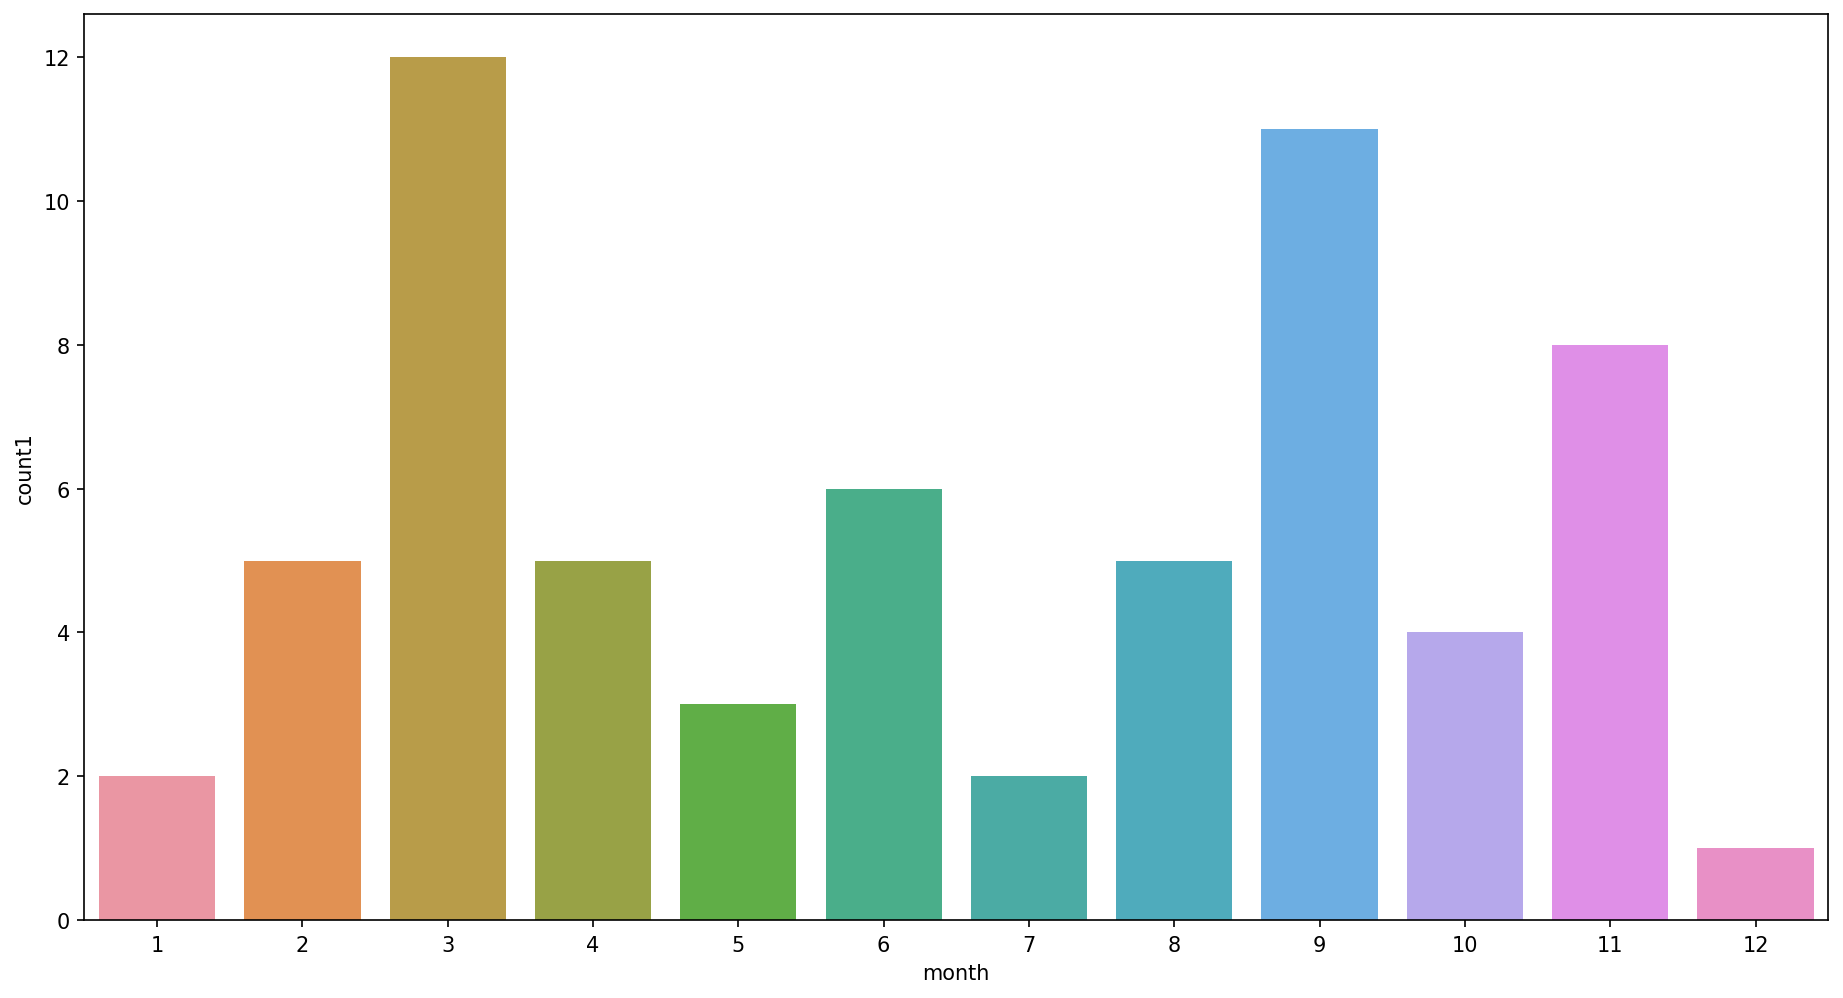

In [24]:
plt.figure(figsize=(15,8),dpi=150)
chart = sn.barplot(x=games_by_month['month'],y=games_by_month['count1'],)
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

### **Games by Genre**

In [25]:
games_by_genre = games.groupby('Genre').agg(count=('Game_Id','count')).reset_index()
games_by_genre

,Genre,count
0,Action,16
1,Action-adventure,21
2,Adventure,6
3,Interactive Story,4
4,RPG,16
5,Simulation,1


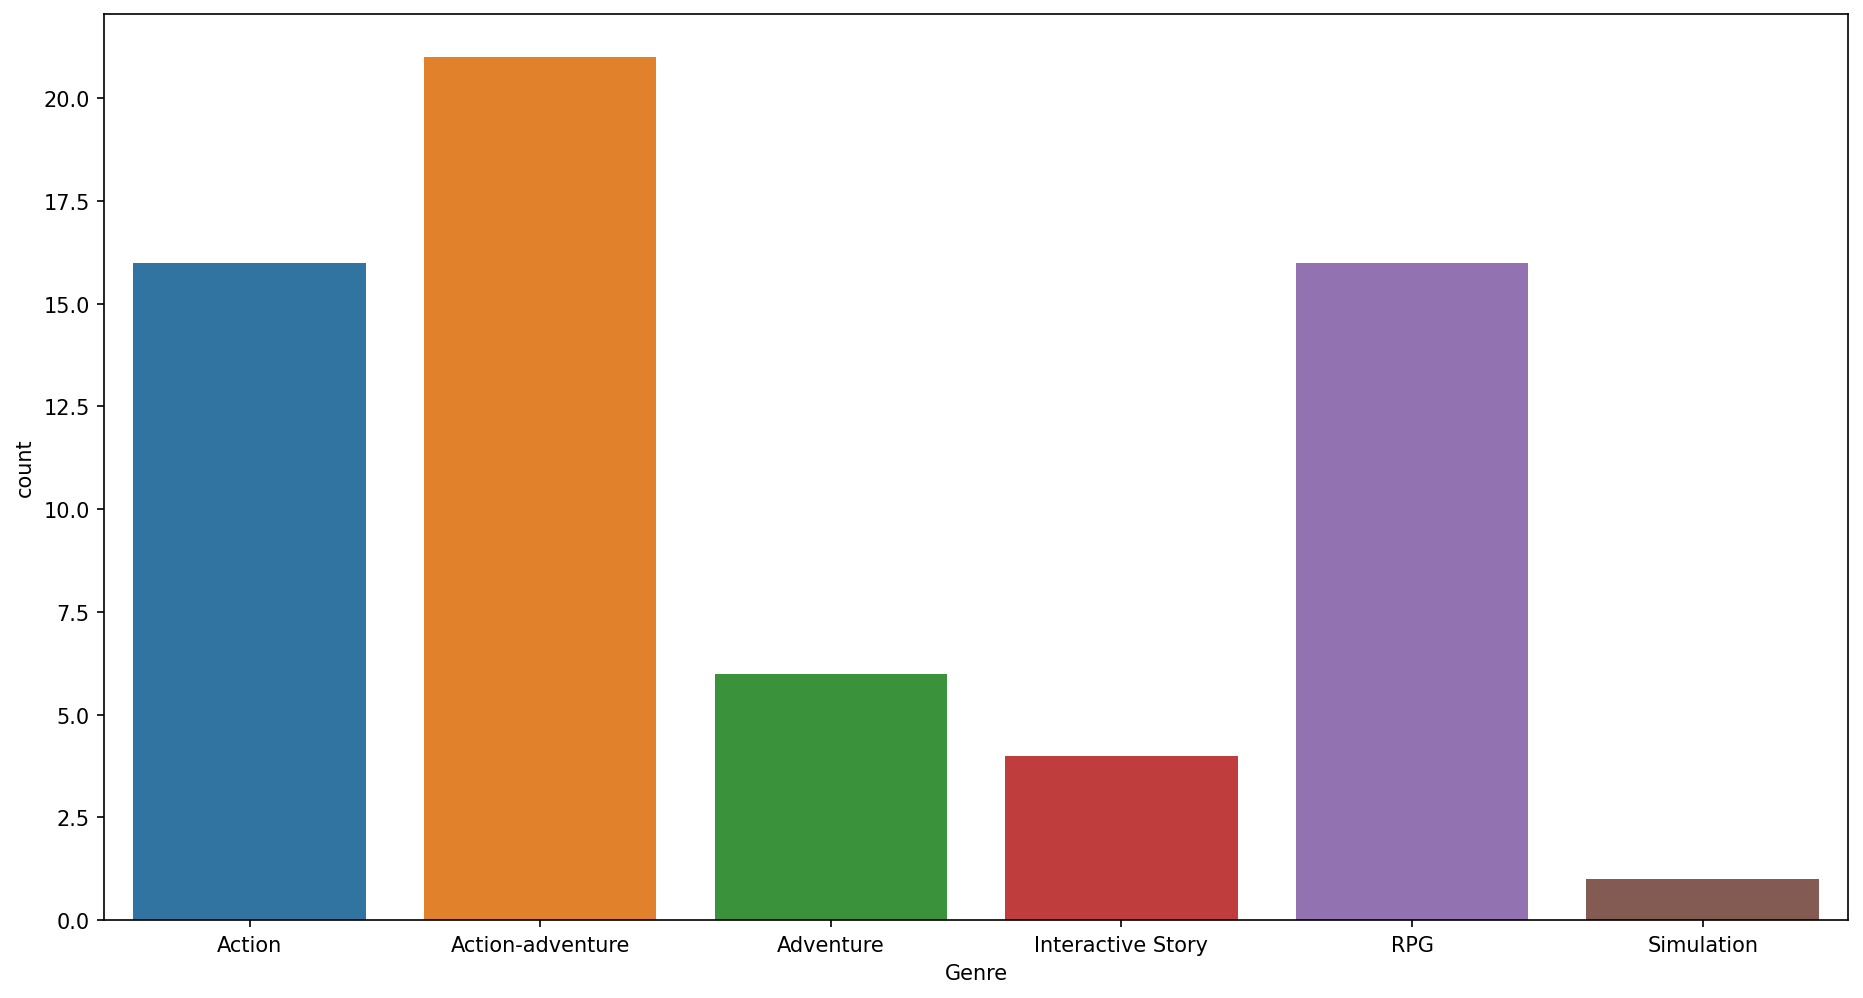

In [26]:
plt.figure(figsize=(15,8),dpi=150)
bar = sn.barplot(x=games_by_genre['Genre'],y=games_by_genre['count'])
plt.show()

Action-adventure, RPG and Action seem to be the most popular genre among all genres.

### **Games by Sub-Genre**

In [27]:
games_by_sgenre = games.groupby('Sub-genre').agg(count1=('Game_Id','count')).reset_index()
games_by_sgenre

,Sub-genre,count1
0,Action RPG,6
1,Action-adventure,16
2,Adventure,4
3,Episodic adventure,1
4,FPS,8
5,Interactive Story,4
6,Metroidvania,2
7,Platform,2
8,Platform RPG,1
9,Platform-adventure,3


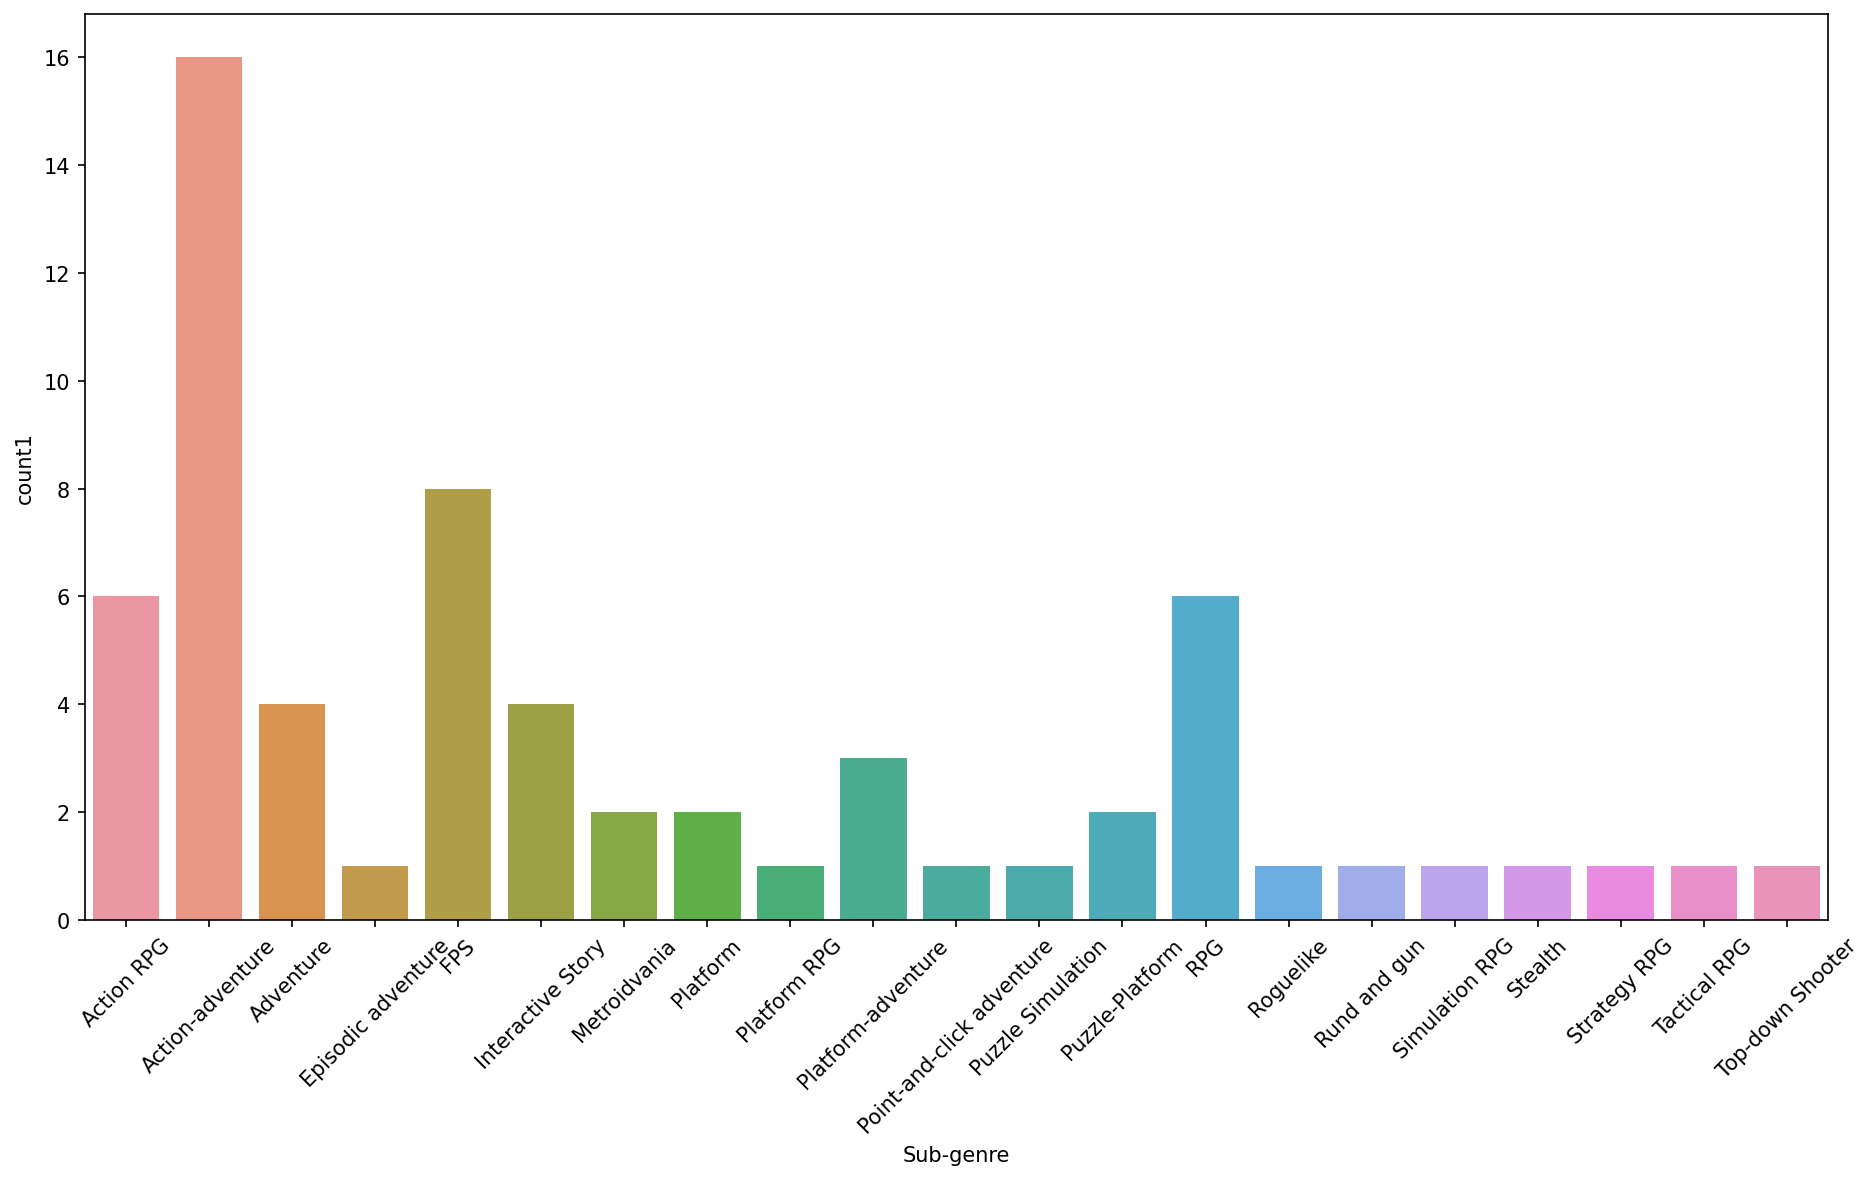

In [28]:
plt.figure(figsize=(15,8),dpi=150)
chart = sn.barplot(x=games_by_sgenre['Sub-genre'],y=games_by_sgenre['count1'],)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

Action RPG, Action-adventure, FPS and RPG are the majority.

### **Games by Genre and Sub-genre**

In [29]:
games_by_ssgenre = games.groupby(['Genre','Sub-genre']).agg(count1=('Game_Id','count'))
games_by_ssgenre

count1
Genre             Sub-genre                        
Action            FPS                             8
                  Platform                        2
                  Platform RPG                    1
                  Puzzle-Platform                 2
                  Rund and gun                    1
                  Stealth                         1
                  Top-down Shooter                1
Action-adventure  Action-adventure               16
                  Metroidvania                    2
                  Platform-adventure              3
Adventure         Adventure                       4
                  Episodic adventure              1
                  Point-and-click adventure       1
Interactive Story Interactive Story               4
RPG               Action RPG                      6
                  RPG                             6
                  Roguelike                       1
                  Simulation RPG                  1
                  Strategy RPG                    1
                  Tactical RPG                    1
Simulation        Puzzle Simulation               1

### **Games by Developer**

In [30]:
games_by_developer = games.groupby(['Developer']).agg(count1=('Game_Id','count')).sort_values(by='count1',ascending=False).reset_index()[0:10]
games_by_developer

,Developer,count1
0,FromSoftware,4
1,Naughty Dog,3
2,Moon Studios,2
3,Nintendo EDP,2
4,Ubisoft Montreal,2
5,PlatinumGames,2
6,Game Freak,2
7,3909 LLC,1
8,Santa Monica Studio,1
9,Northway Gates,1


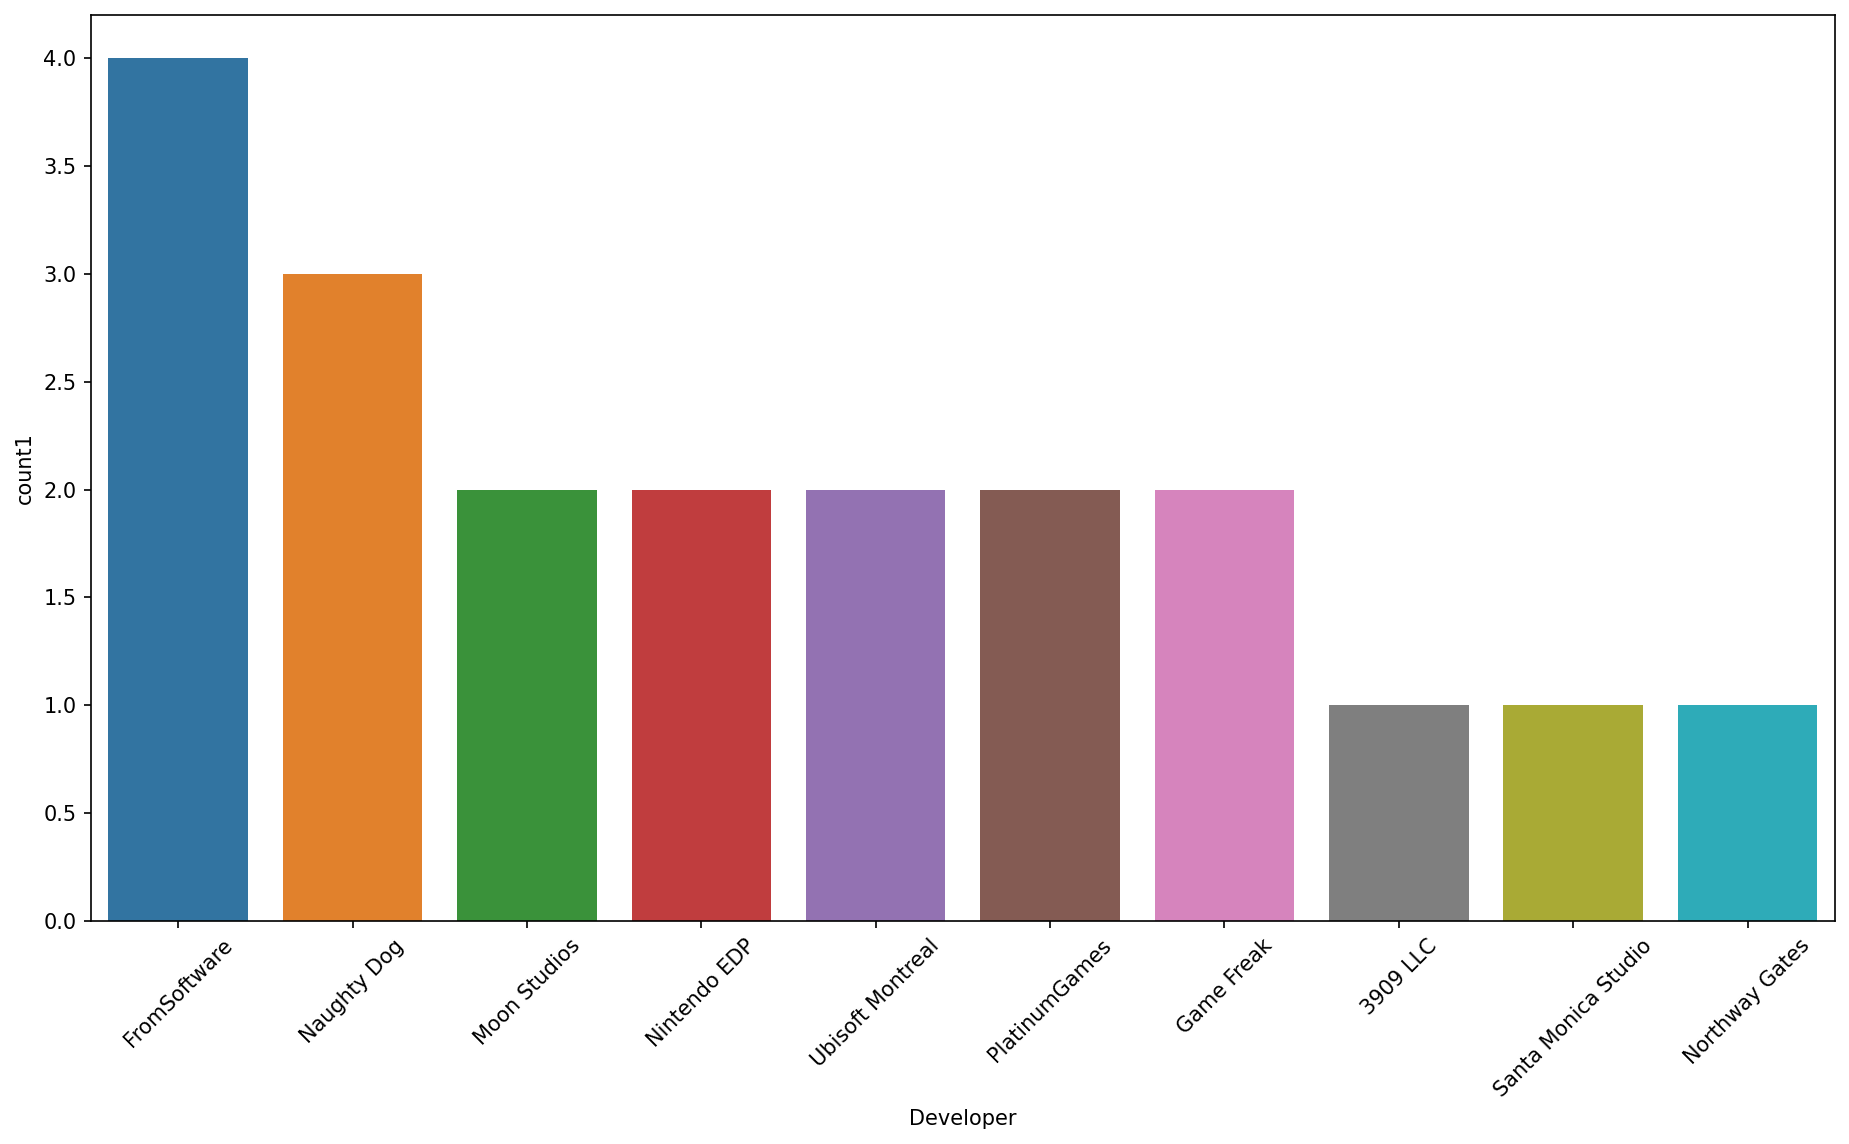

In [31]:
games_by_developer = games.groupby(['Developer']).agg(count1=('Game_Id','count')).sort_values(by='count1',ascending=False).reset_index()[0:10]
plt.figure(figsize=(15,8),dpi=150)
chart = sn.barplot(x=games_by_developer['Developer'],y=games_by_developer['count1'],)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

### **Games by Publisher**

In [32]:
games_by_publisher = games.groupby(['Publisher']).agg(count1=('Game_Id','count')).sort_values(by='count1',ascending=False).reset_index()[0:10]
games_by_publisher

,Publisher,count1
0,Nintendo,6
1,Finji,4
2,Sony Computer Entertainment,4
3,Activision,3
4,Annapurna Interactive,3
5,Sony Interactive Entertaiment,3
6,2K Games,2
7,Rockstar Games,2
8,Ubisoft,2
9,SquareEnix,1


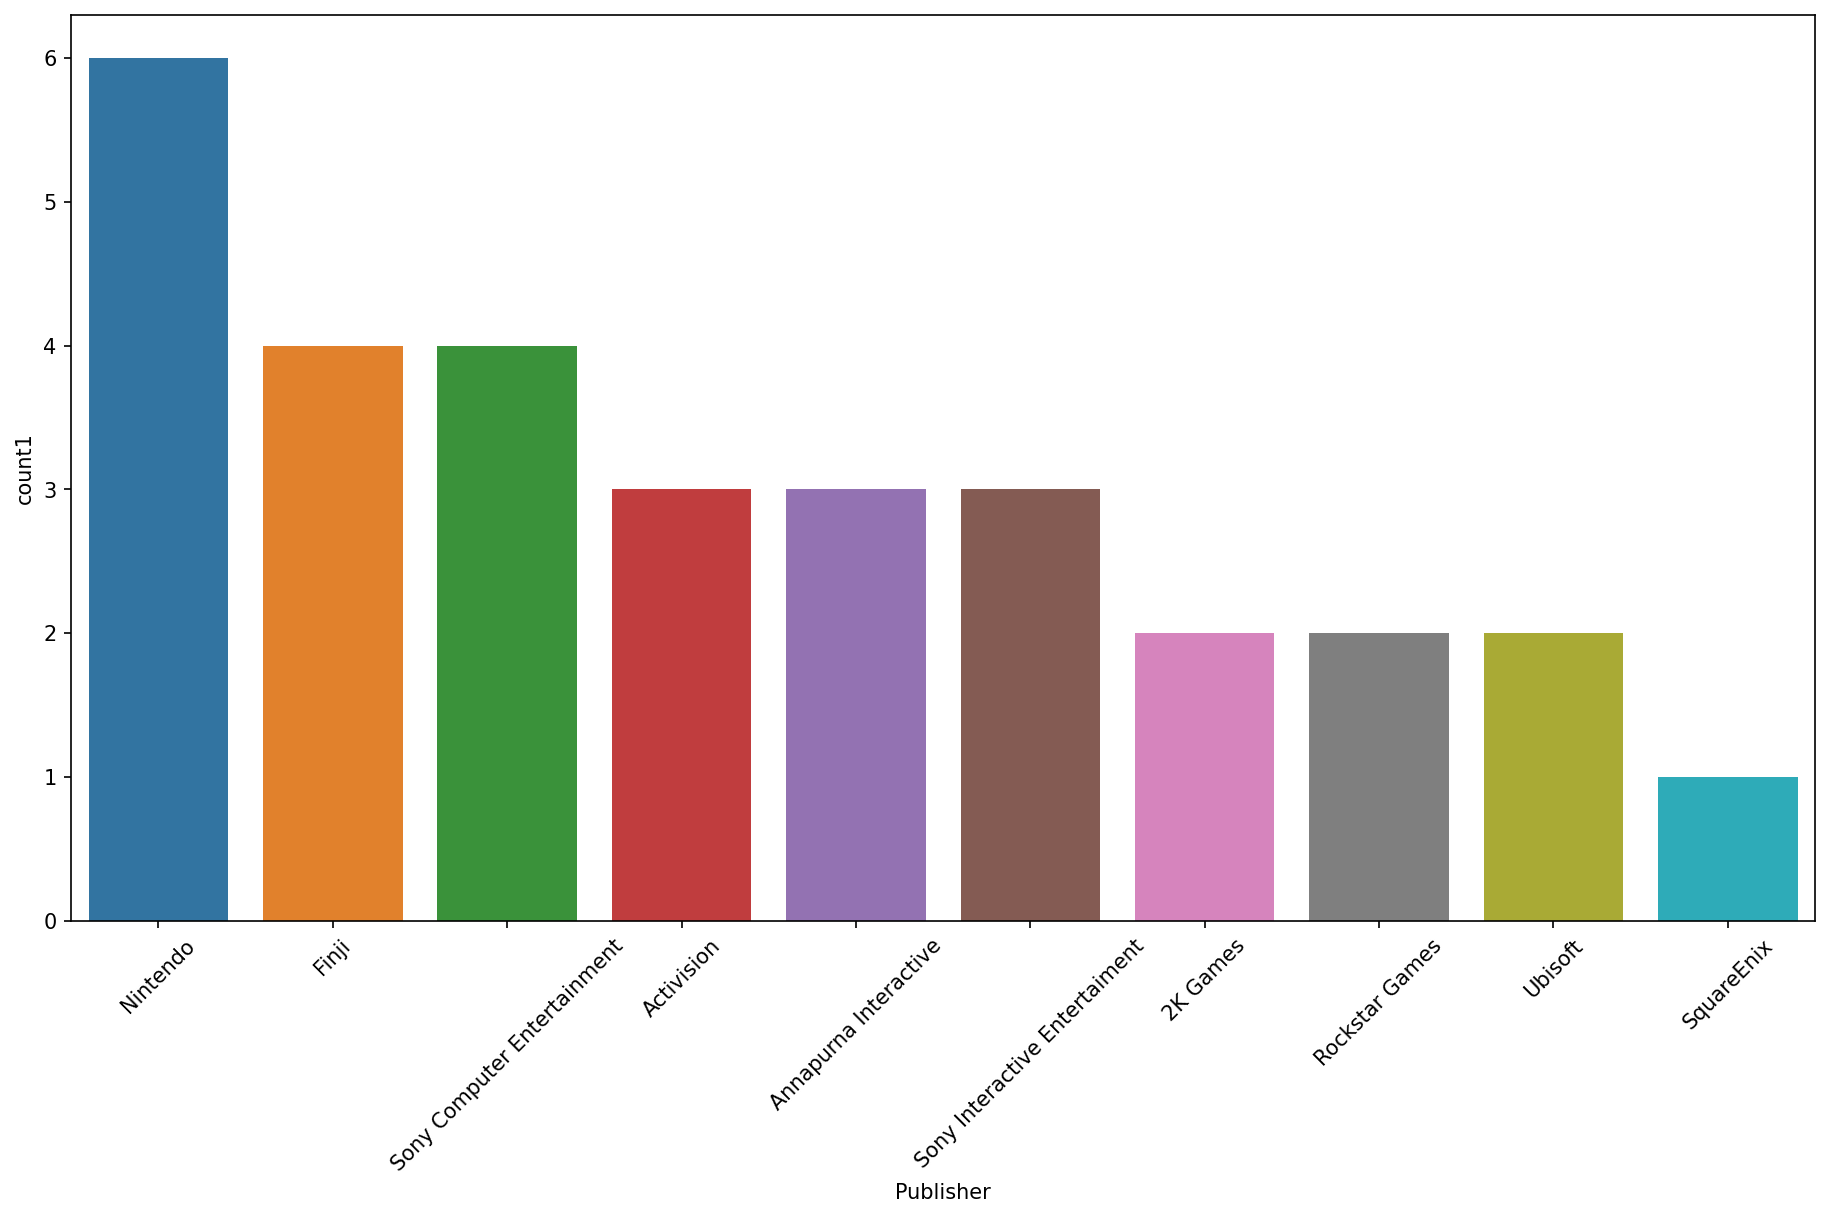

In [33]:
plt.figure(figsize=(15,8),dpi=150)
chart = sn.barplot(x=games_by_publisher['Publisher'],y=games_by_publisher['count1'],)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

### **Games by Country**

In [34]:
games_by_country = games.groupby(['Country']).agg(count1=('Game_Id','count')).sort_values(by='count1',ascending=False).reset_index()
games_by_country

,Country,count1
0,USA,24
1,JPN,16
2,CAN,6
3,GBR,4
4,AUT,3
5,FRA,3
6,SWE,2
7,AUS,1
8,BEL,1
9,DNK,1


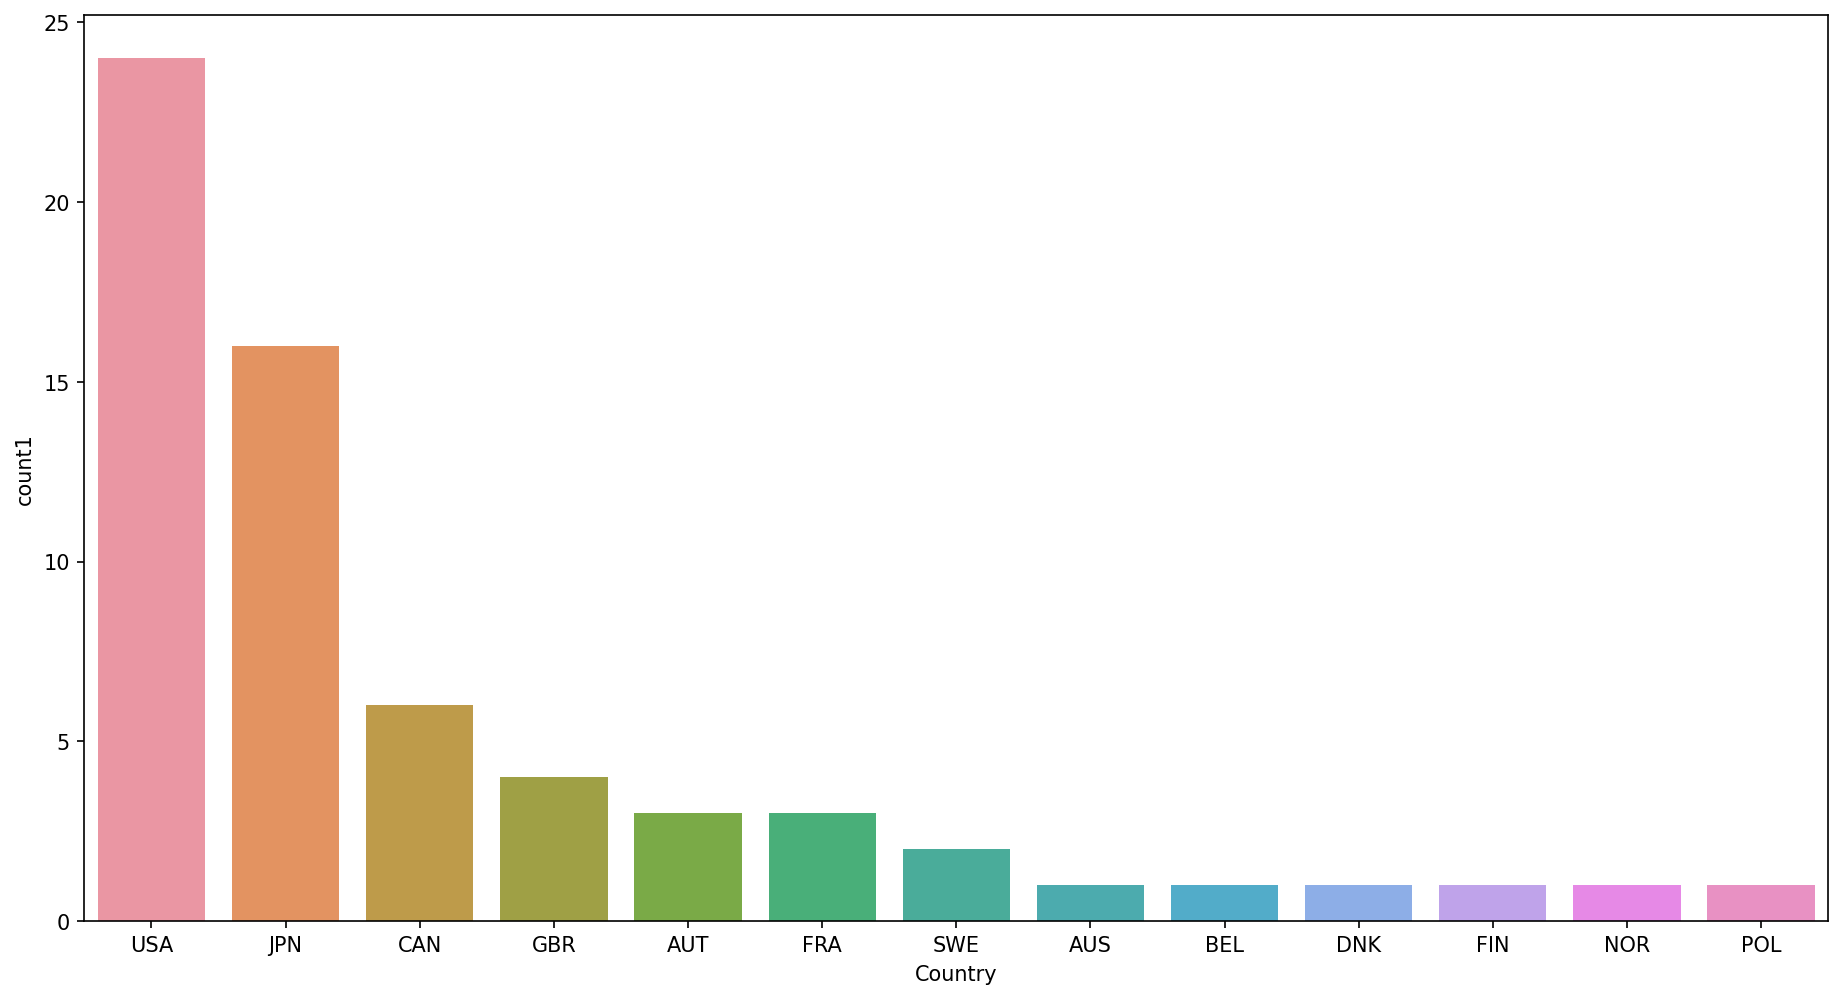

In [35]:
plt.figure(figsize=(15,8),dpi=150)
chart = sn.barplot(x=games_by_country['Country'],y=games_by_country['count1'],)
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

### **Games by Platform**

In [36]:
games_by_platform = games.groupby(['Platform']).agg(count1=('Game_Id','count')).sort_values(by='count1',ascending=False).reset_index()
games_by_platform

,Platform,count1
0,Multi,47
1,Computer,6
2,Nintendo Switch,3
3,PS4,3
4,PS3,2
5,Mobile,1
6,Nintendo 3DS,1
7,Wii U,1


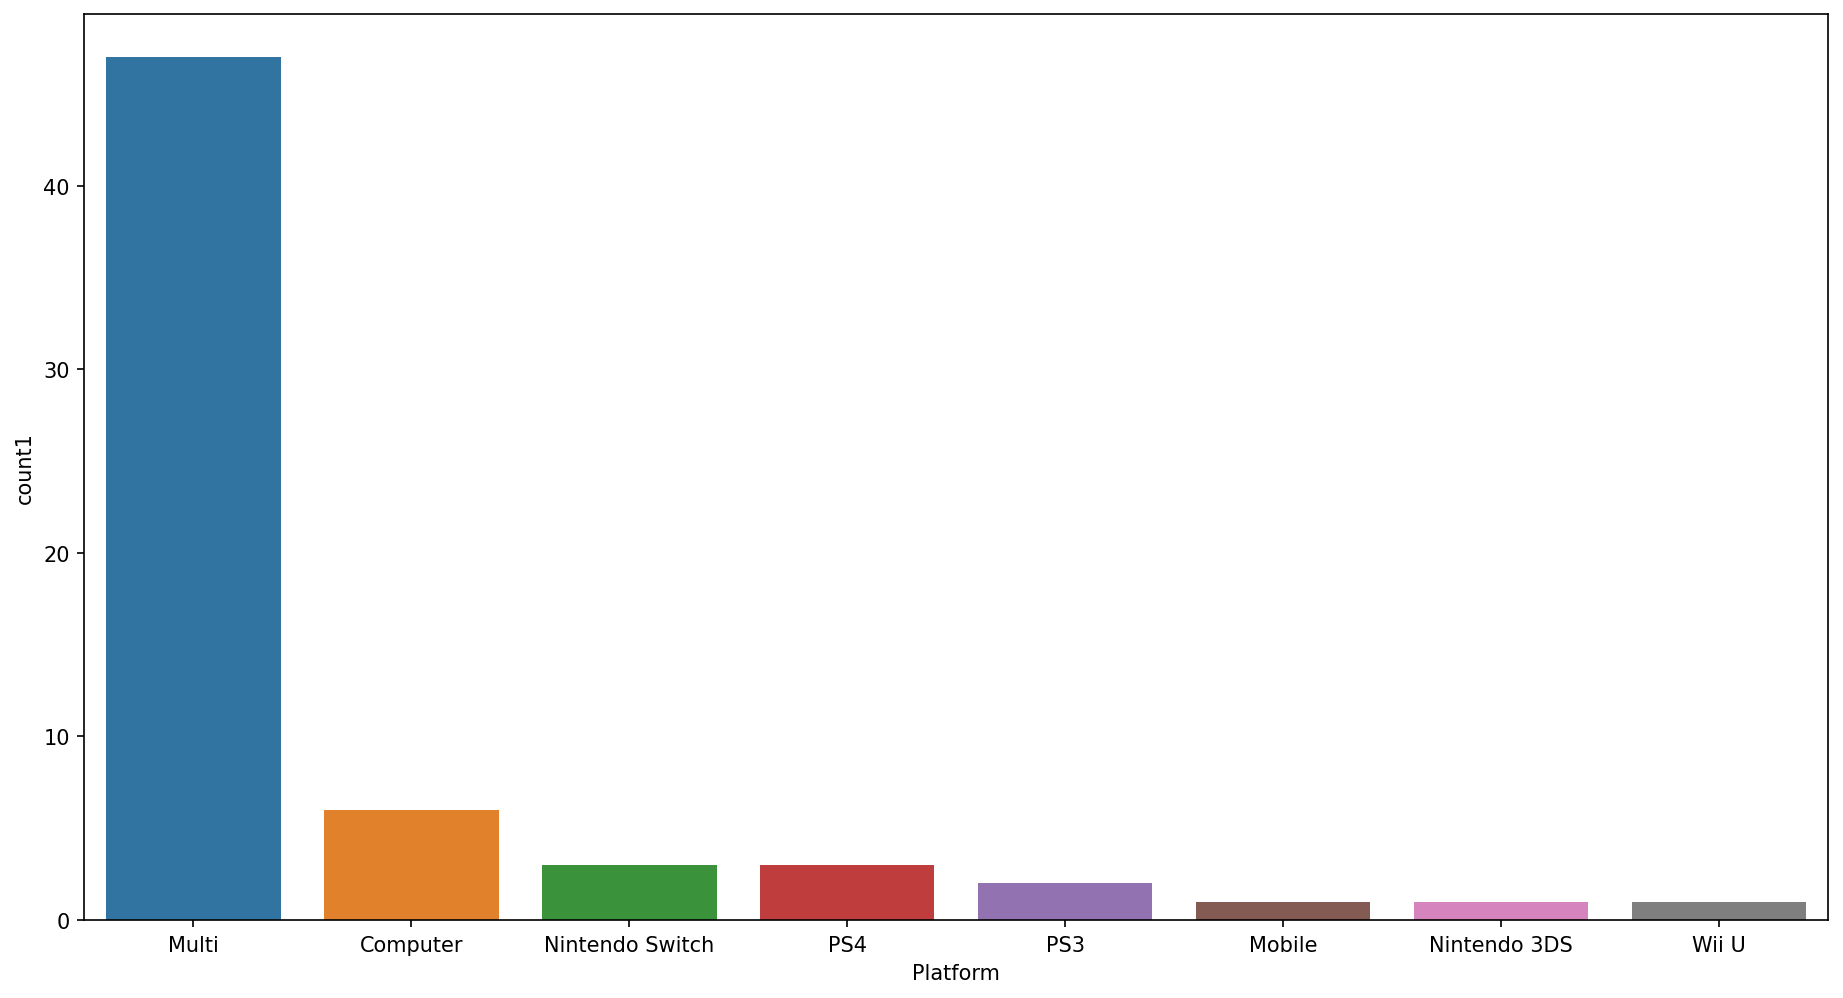

In [37]:
plt.figure(figsize=(15,8),dpi=150)
chart = sn.barplot(x=games_by_platform['Platform'],y=games_by_platform['count1'],)
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

### **Game score per Genre**

In [38]:
games = games.rename(columns={"Metacritic ": "Metacritic"})

In [39]:
score_by_genre = games.groupby('Genre').agg(metacritic=('Metacritic','mean')
                                            , destructoid=('Destructoid','mean')
                                            , ign=('IGN','mean')
                                            , gamespot=('GameSpot','mean')
                                            , avg=('Avg_Reviews','mean')).transpose()
score_by_genre

Genre,Action,Action-adventure,Adventure,Interactive Story,RPG,Simulation
metacritic,8.75000,9.052381,8.633333,8.825,8.99375,8.9
destructoid,9.03125,9.380952,9.183333,9.000,8.93750,9.0
ign,9.25000,9.366667,9.050000,8.975,9.32500,8.7
gamespot,8.59375,8.928571,8.666667,8.650,9.15625,8.0
avg,8.90625,9.200000,8.883333,8.875,9.11250,8.5


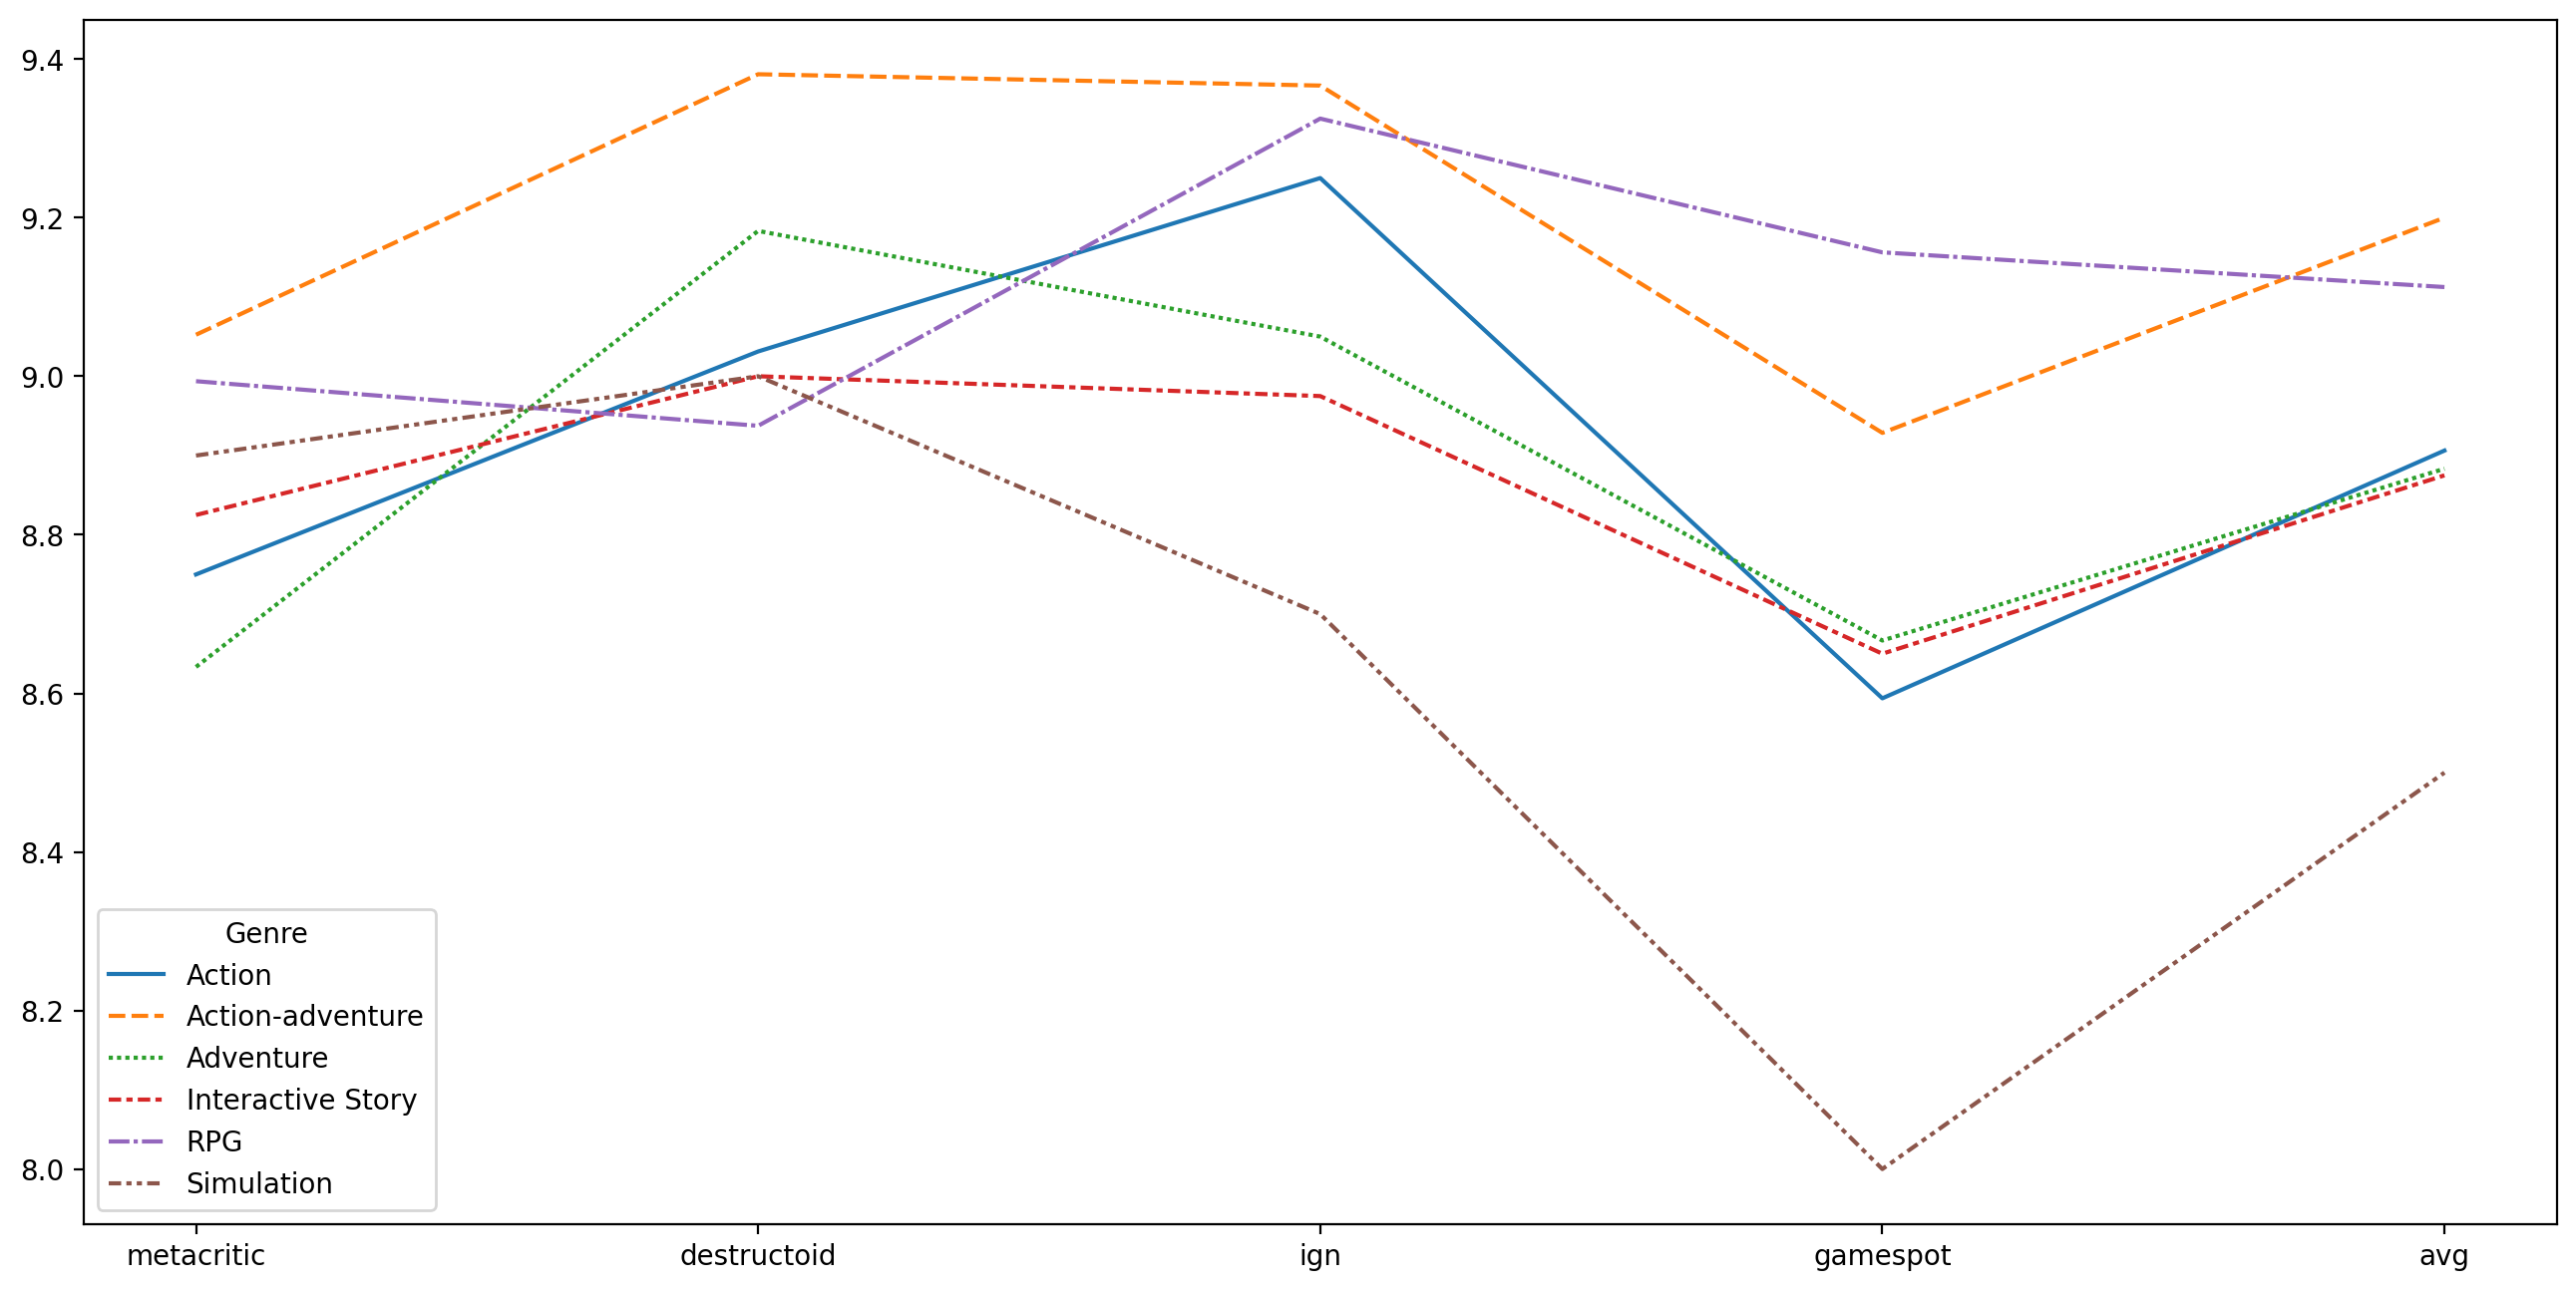

In [40]:
plt.figure(figsize=(16,8),dpi=200)
sn.lineplot(data=score_by_genre)
plt.show()

### **Game score by Publisher**

In [41]:
score_by_publisher = games.groupby('Platform').agg(metacritic=('Metacritic','mean')
                                            , destructoid=('Destructoid','mean')
                                            , ign=('IGN','mean')
                                            , gamespot=('GameSpot','mean')
                                            , avg=('Avg_Reviews','mean')).transpose()
score_by_publisher

Platform,Computer,Mobile,Multi,Nintendo 3DS,Nintendo Switch,PS3,PS4,Wii U
metacritic,8.800000,8.7,8.902128,8.7,8.866667,9.35,9.000000,9.1
destructoid,9.416667,8.0,9.140426,9.0,8.666667,9.50,8.833333,10.0
ign,9.416667,9.6,9.197872,9.0,9.600000,9.50,9.366667,9.5
gamespot,8.600000,9.0,8.893617,8.0,9.333333,8.75,8.000000,10.0
avg,9.066667,8.8,9.038298,8.7,9.100000,9.30,8.833333,9.7


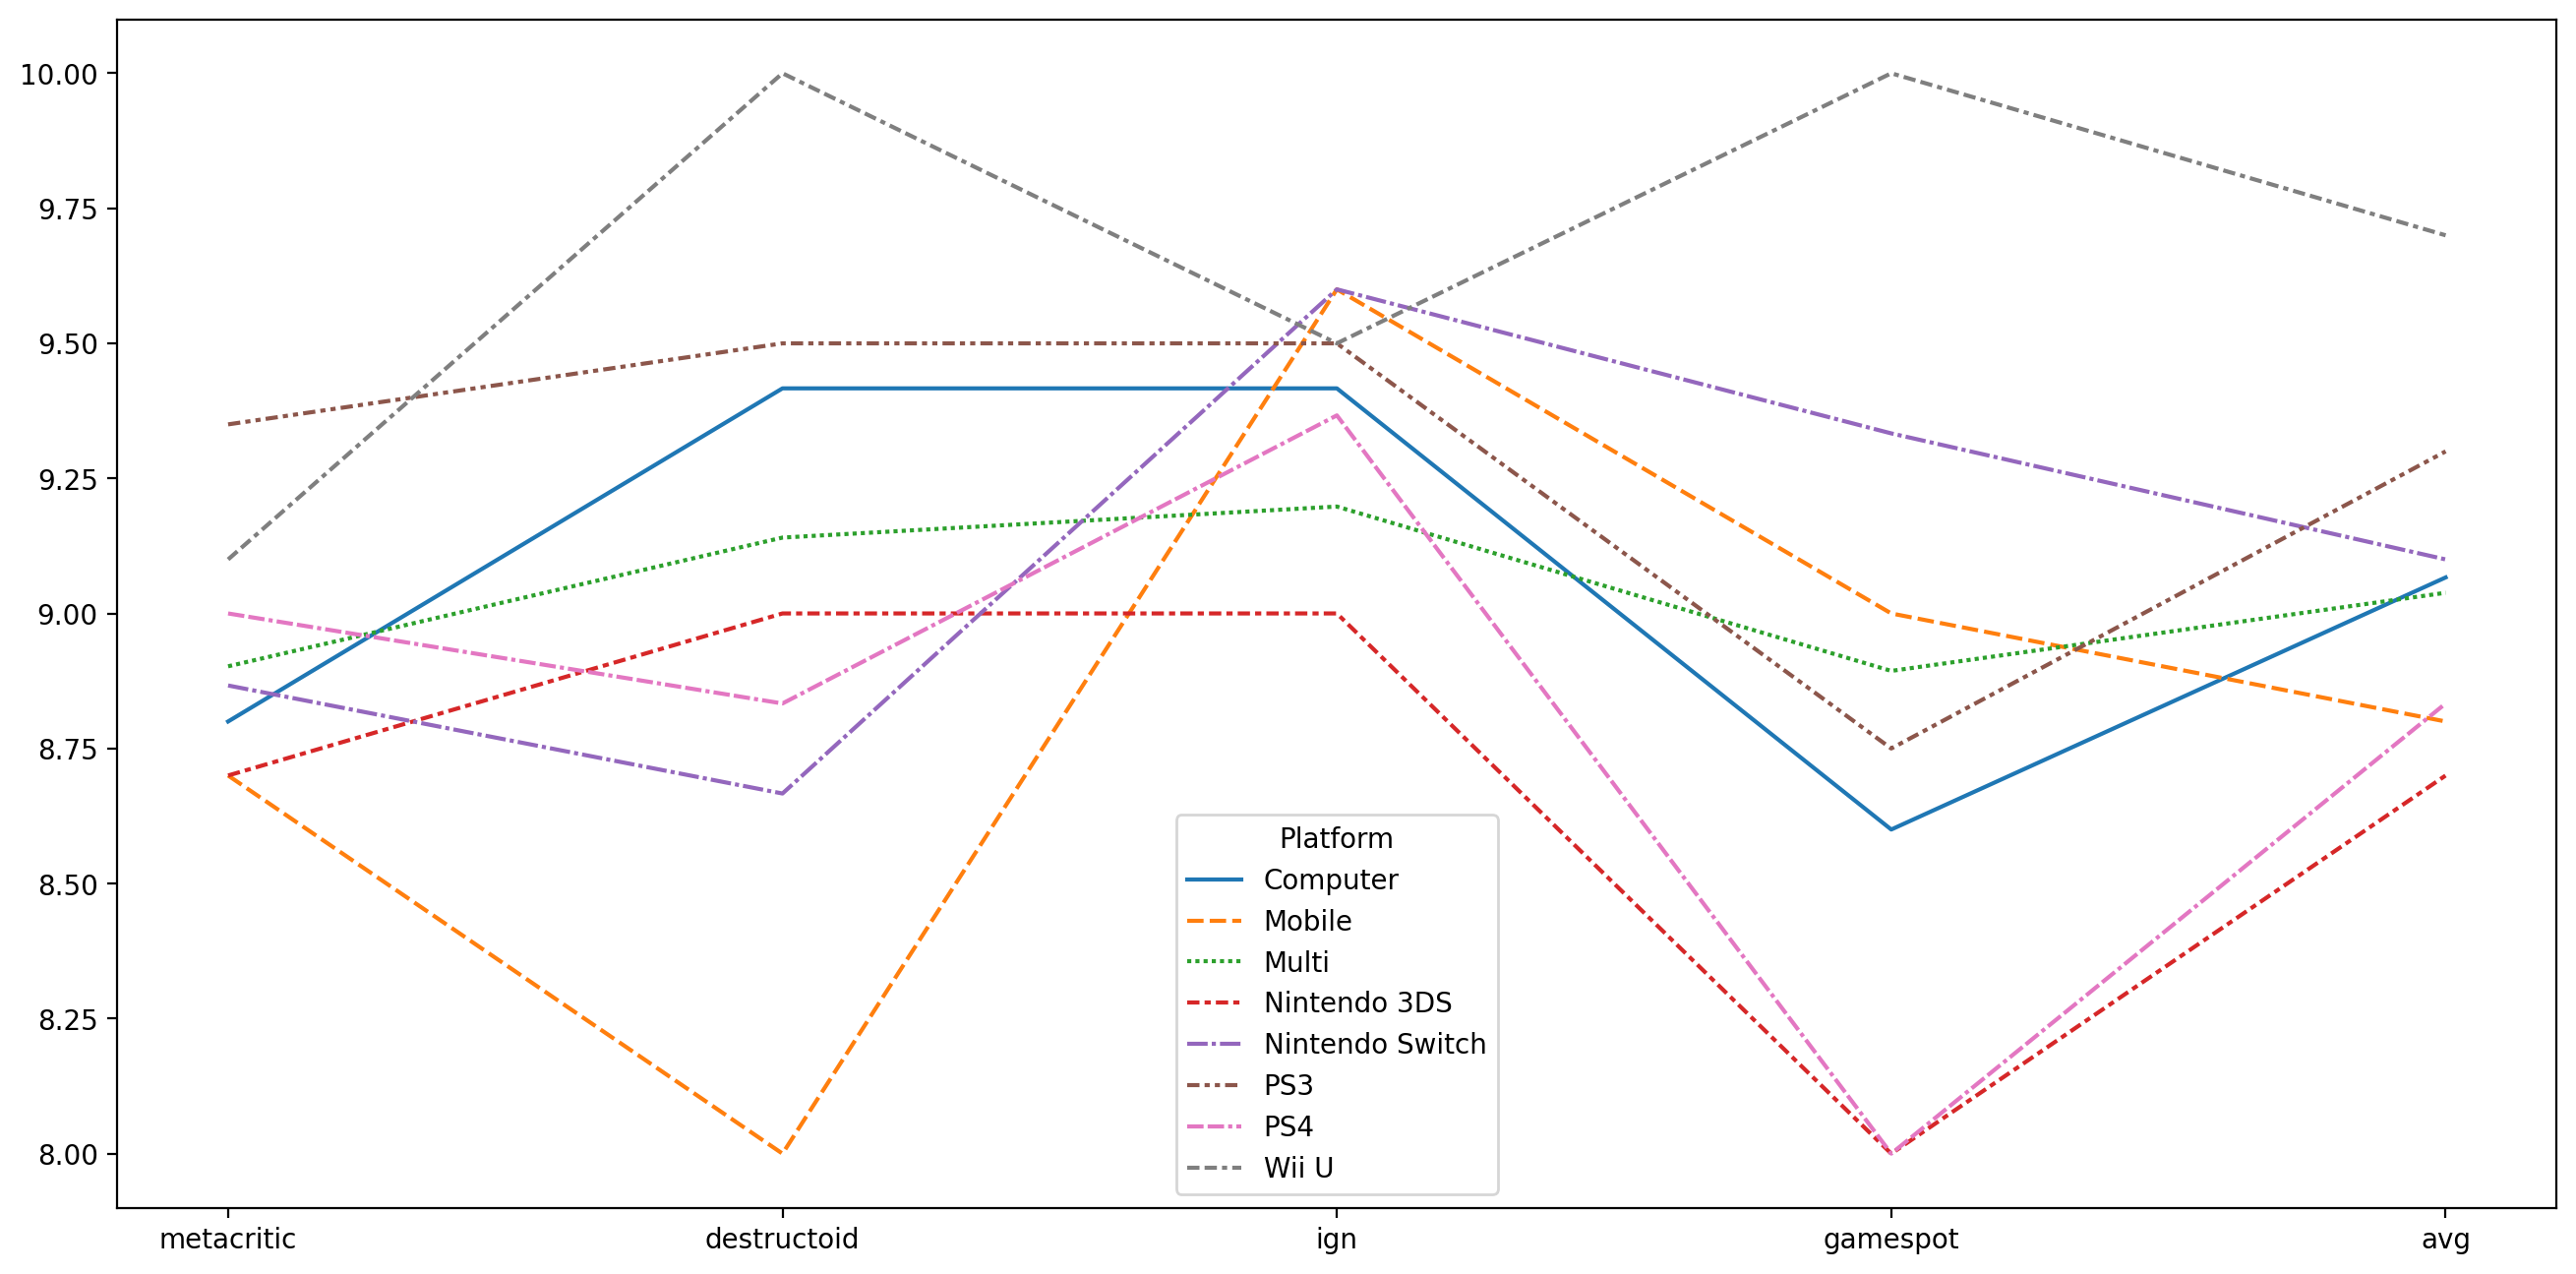

In [42]:
plt.figure(figsize=(16,8),dpi=200)
sn.lineplot(data=score_by_publisher)
plt.show()

### **Customizable main**

In [43]:
customizable = games.groupby('Customizable_main').agg(cus=('Game_Id','count')).reset_index()
customizable

,Customizable_main,cus
0,No,49
1,Non-Binary,7
2,Yes,8


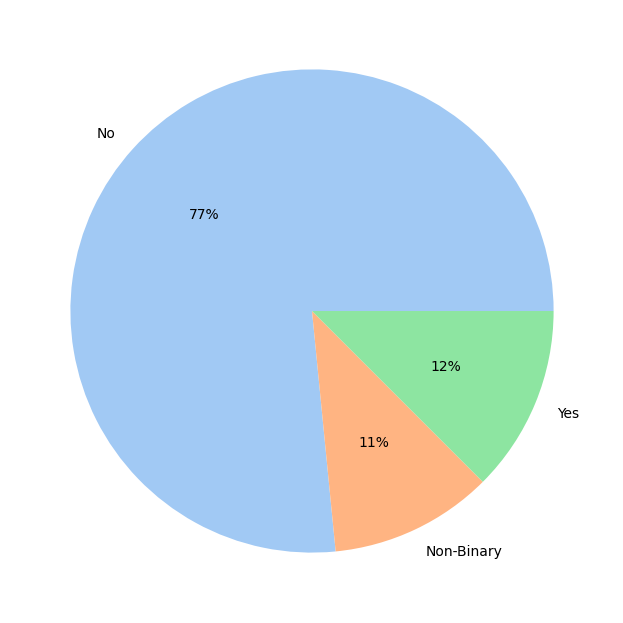

In [44]:
data = customizable['cus']
labels = customizable['Customizable_main']

plt.figure(figsize=(8,8),dpi=100)
colors = sn.color_palette('pastel')[0:len(labels)]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [45]:
cus_score = games.groupby('Customizable_main').agg(metacritic=('Metacritic','mean')
                                            , destructoid=('Destructoid','mean')
                                            , ign=('IGN','mean')
                                            , gamespot=('GameSpot','mean')
                                            , avg=('Avg_Reviews','mean')).transpose()
cus_score

Customizable_main,No,Non-Binary,Yes
metacritic,8.893878,8.928571,8.9625
destructoid,9.114286,9.500000,8.9375
ign,9.267347,9.128571,9.3500
gamespot,8.777551,9.000000,9.1250
avg,9.022449,9.157143,9.0750


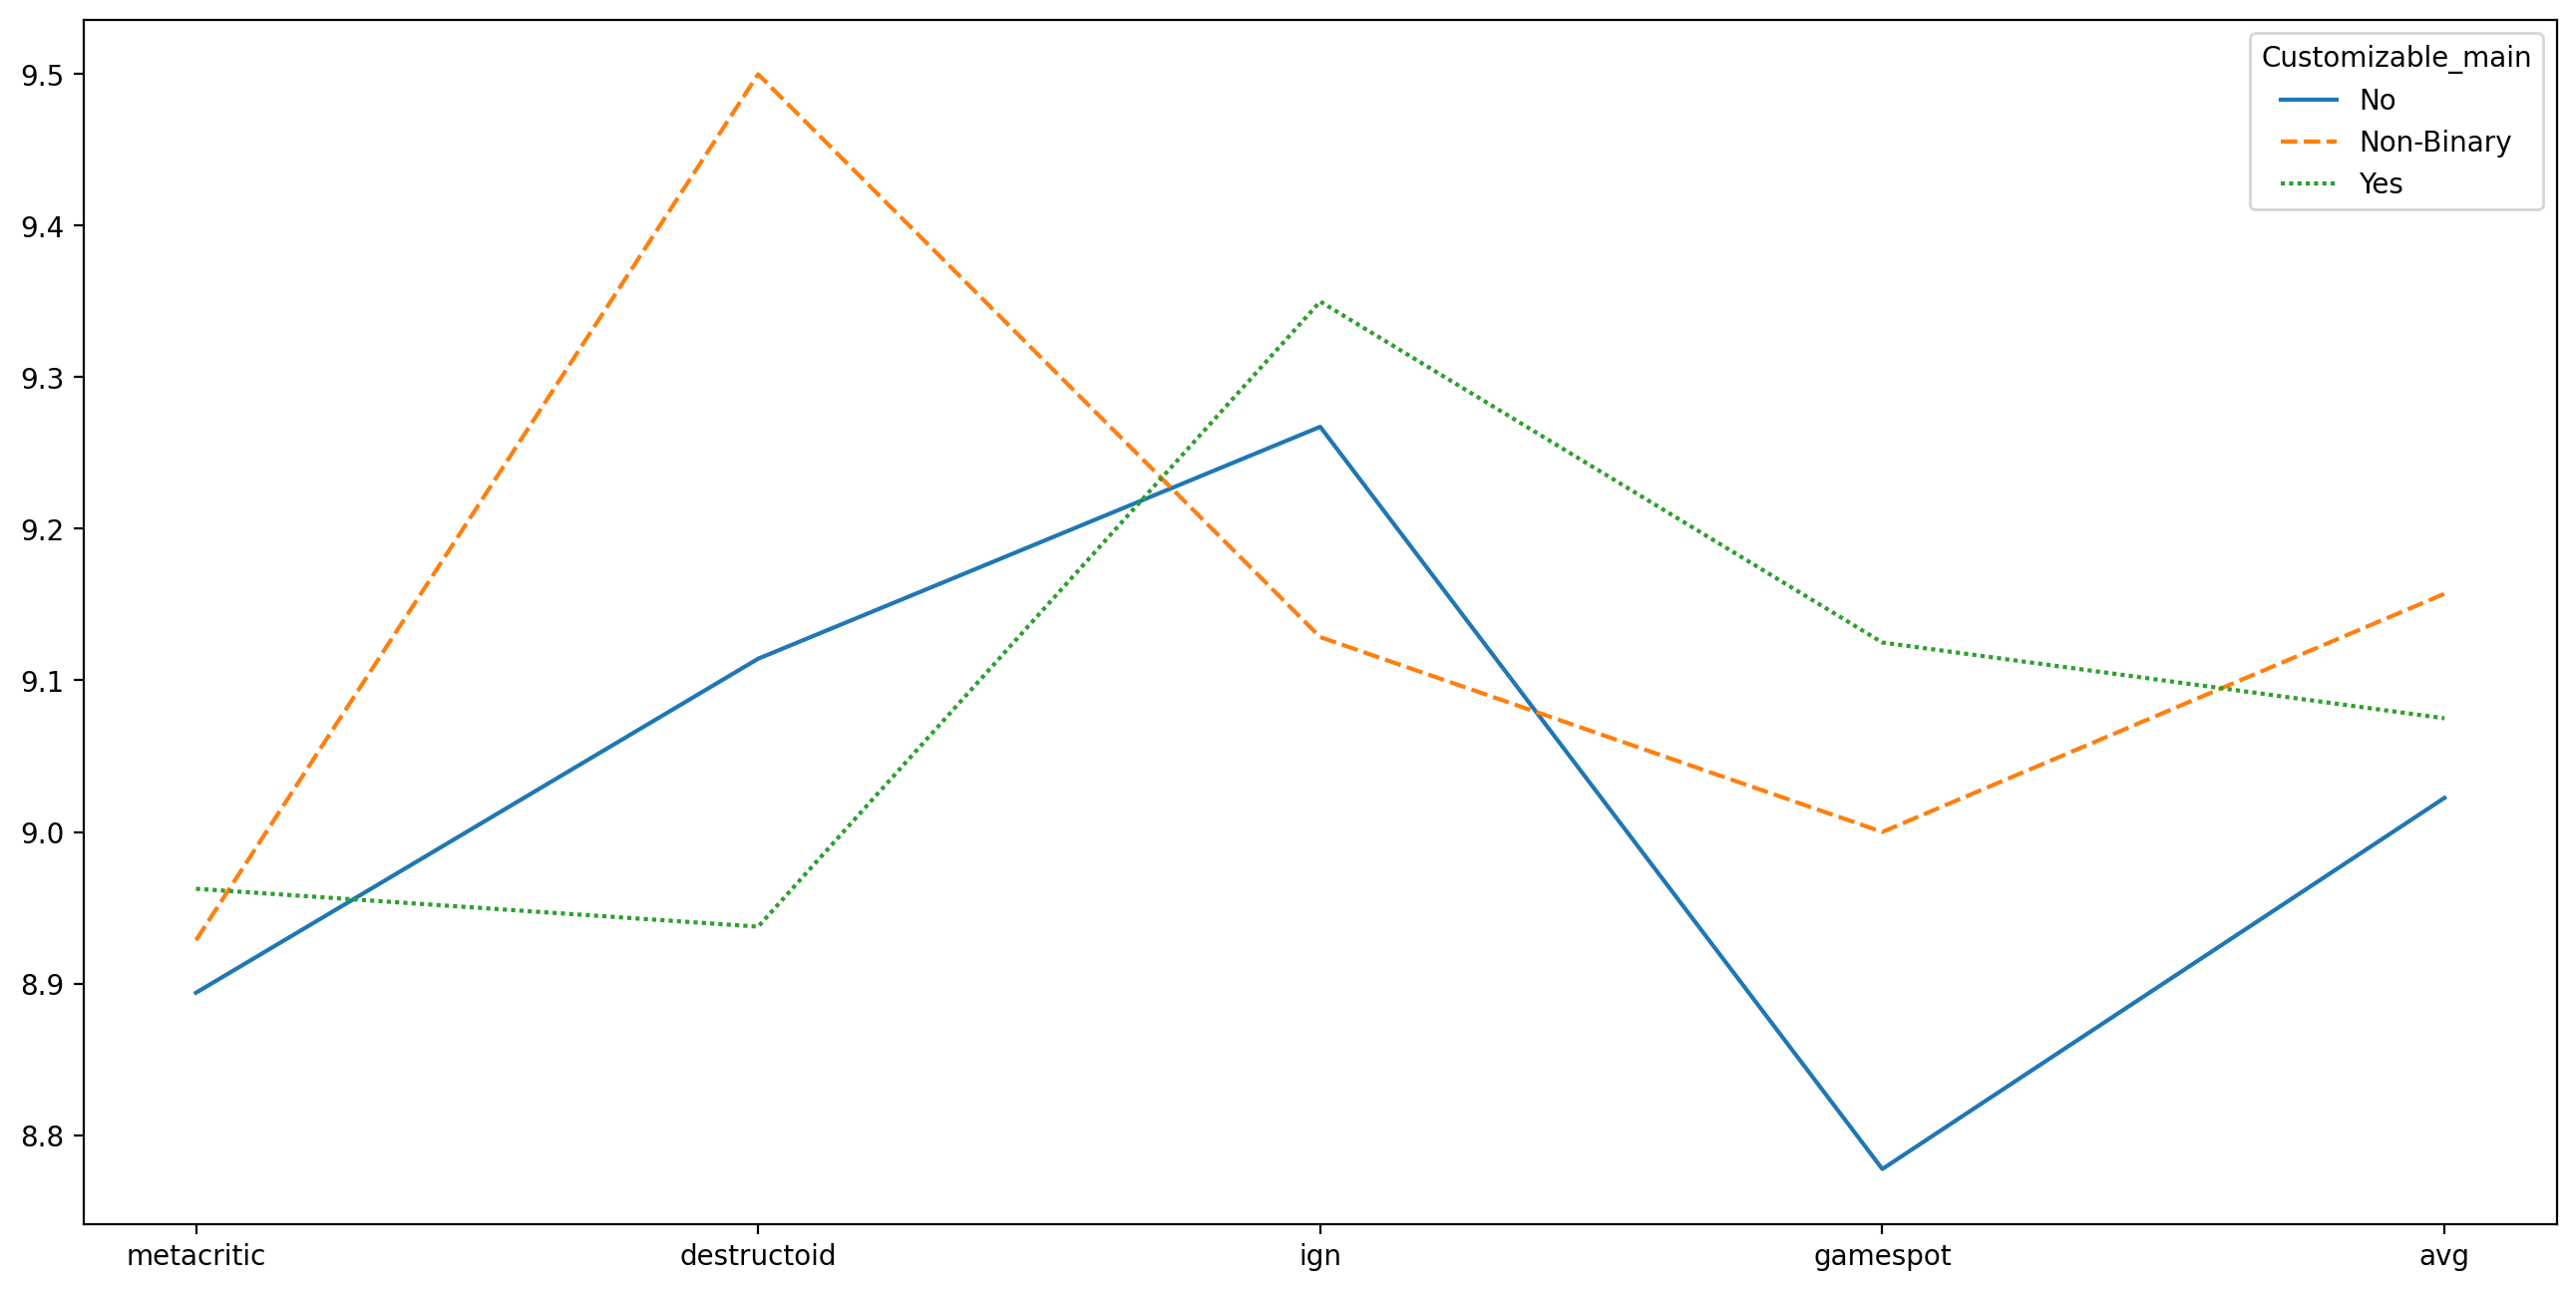

In [46]:
plt.figure(figsize=(16,8),dpi=200)
sn.lineplot(data=cus_score)
plt.show()

## ***ABOUT CHARACTERS***

### **Gender**

In [47]:
characters.head()

,Name,Gender,Game,Age_range,Playable,Sexualization,Id,Species,Side,Relevance,Romantic_Interest
0,Farah,Female,CODMW,Adult,1,0,CODMW_Farah,Human,P,PA,No
1,Protagonist,Custom,PSS,Teenager,1,0,PSS_Protagonist,Human,P,PA,No
2,Magnolia,Female,PSS,Elderly,0,0,PSS_Magnolia,Human,P,SC,No
3,Sonia,Female,PSS,Adult,0,0,PSS_Sonia,Human,P,SC,No
4,Marnie,Female,PSS,Teenager,0,0,PSS_Marnie,Human,B,MC,No


In [48]:
gender = characters.groupby('Gender').agg(count=('Id','count')).reset_index()
gender

,Gender,count
0,Custom,8
1,Female,203
2,Male,393
3,Non-binary,33


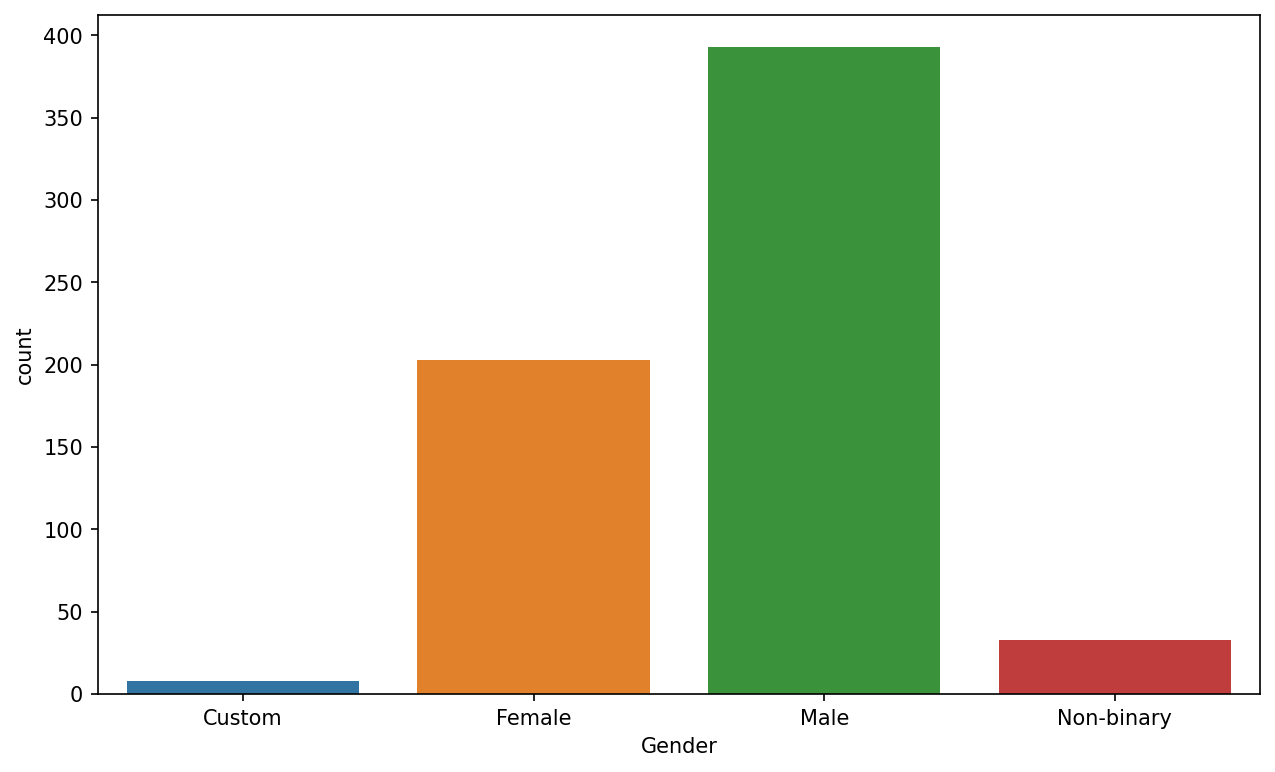

In [49]:
plt.figure(figsize=(10,6),dpi=150)
chart = sn.barplot(x=gender['Gender'],y=gender['count'])
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

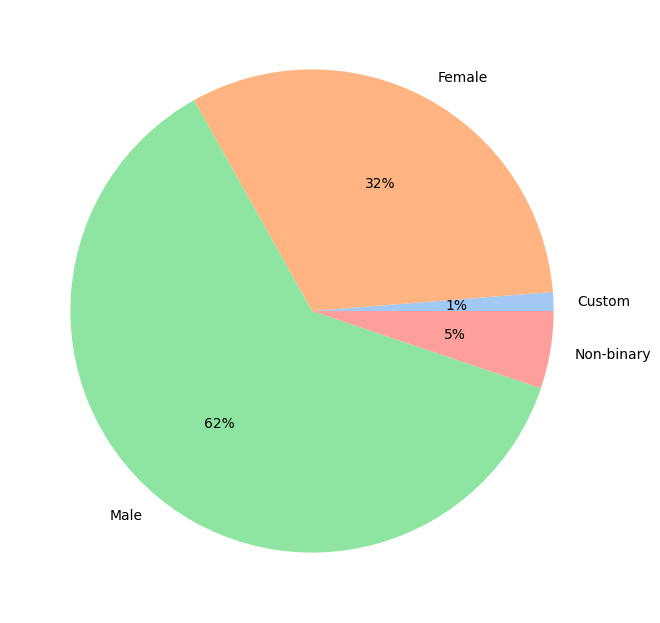

In [50]:
data = gender['count']
labels = gender['Gender']

plt.figure(figsize=(8,8),dpi=100)
colors = sn.color_palette('pastel')[0:len(labels)]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()


### **Age range**

In [51]:
arange = characters.groupby('Age_range').agg(count=('Id','count')).reset_index()
arange

,Age_range,count
0,Adult,264
1,Child,37
2,Elderly,29
3,Infant,3
4,Middle-aged,63
5,Teenager,46
6,Unknown,136
7,Young adult,59


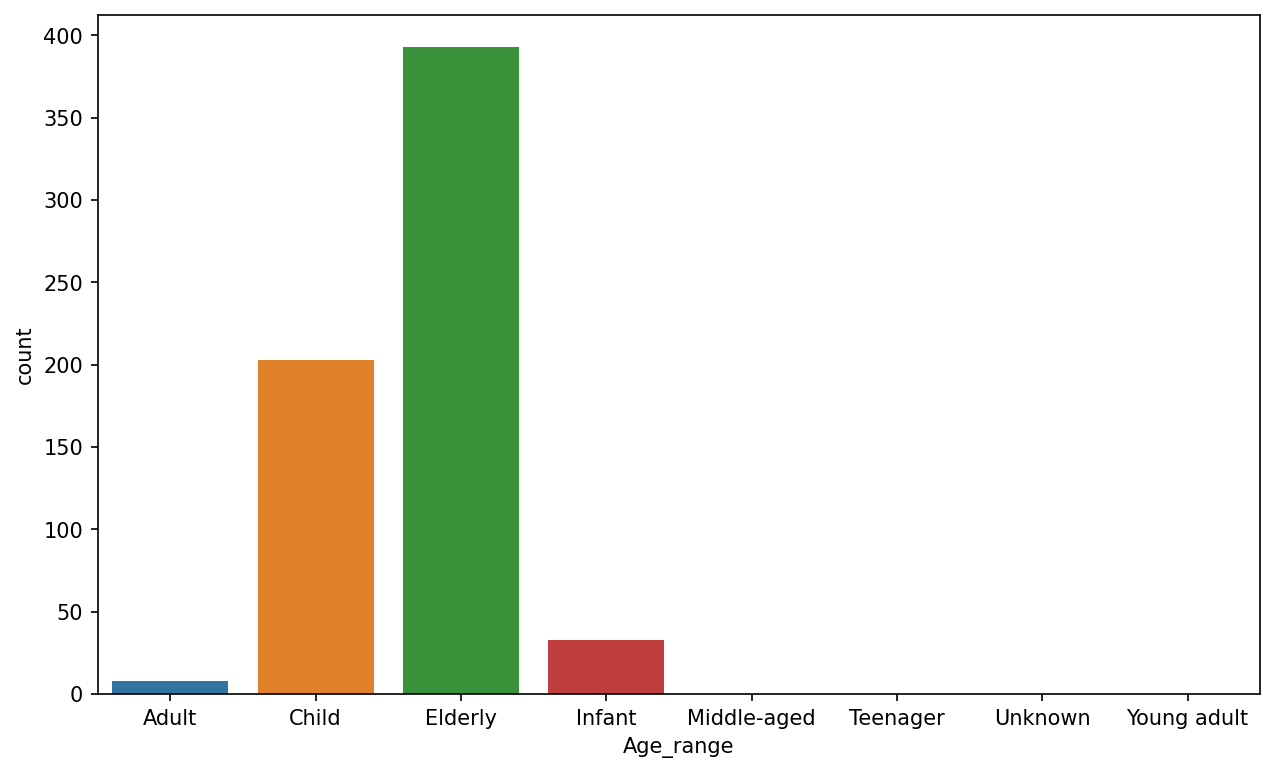

In [52]:
plt.figure(figsize=(10,6),dpi=150)
chart = sn.barplot(x=arange['Age_range'],y=gender['count'])
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

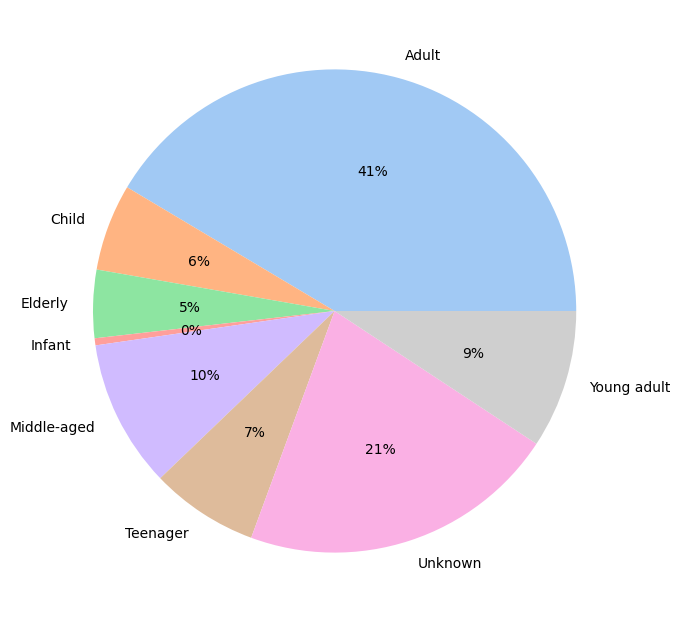

In [53]:
data = arange['count']
labels = arange['Age_range']

plt.figure(figsize=(8,8),dpi=100)
colors = sn.color_palette('pastel')[0:len(labels)]
plt.pie(data, labels = labels, colors = colors, autopct='%.00f%%')
plt.show()


### **Playable**

In [54]:
playable = characters.groupby('Playable').agg(count=('Id','count')).reset_index()
playable

,Playable,count
0,0,514
1,1,123


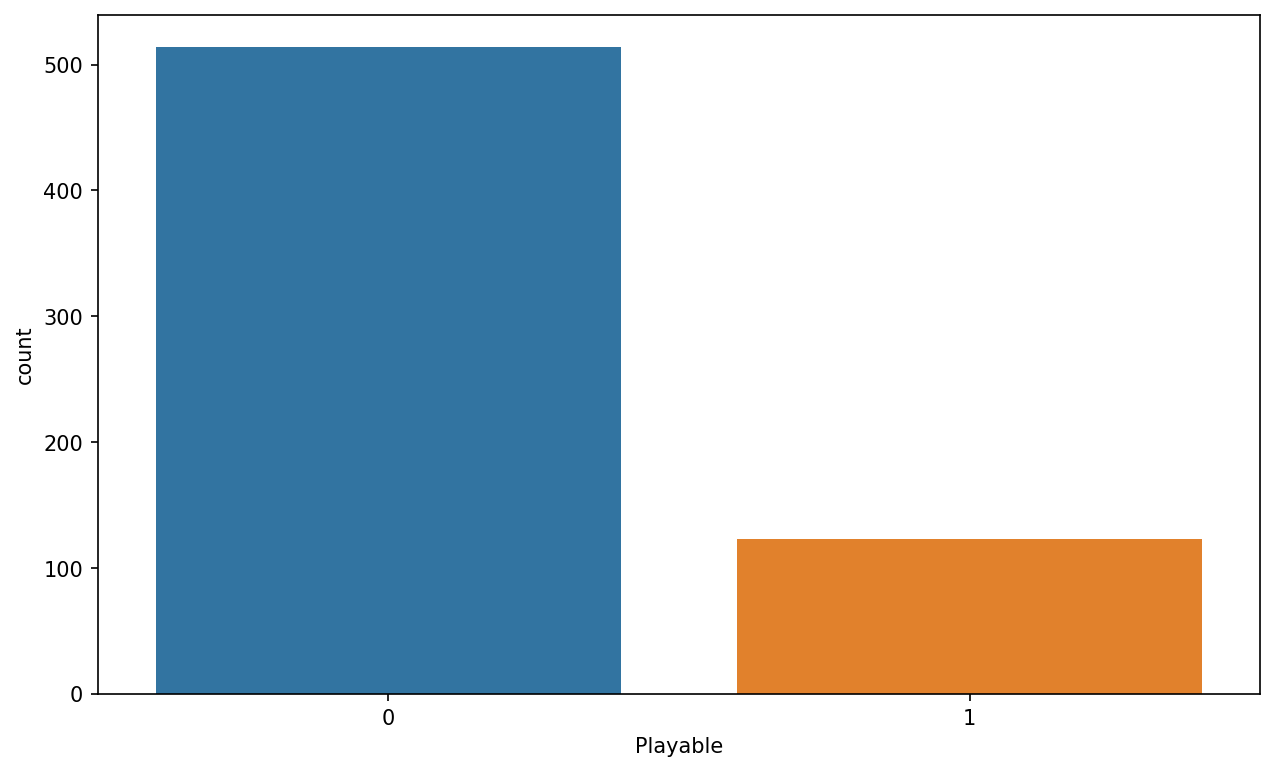

In [55]:
plt.figure(figsize=(10,6),dpi=150)
chart = sn.barplot(x=playable['Playable'],y=playable['count'])
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

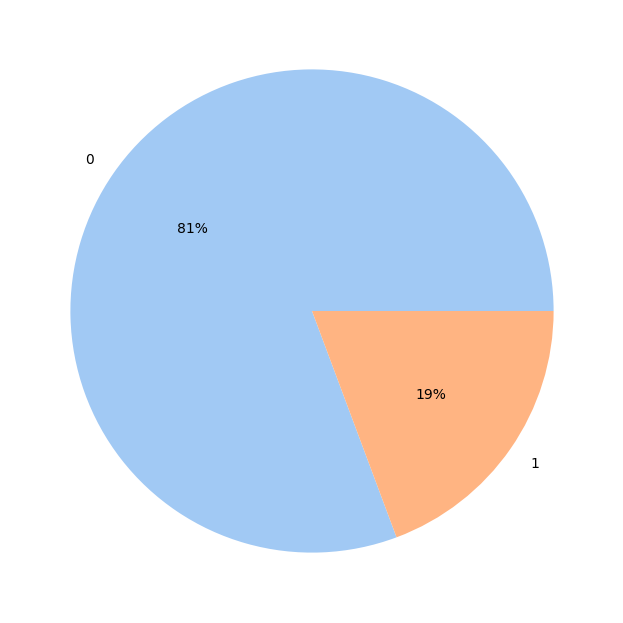

In [56]:
data = playable['count']
labels = playable['Playable']

plt.figure(figsize=(8,8),dpi=100)
colors = sn.color_palette('pastel')[0:len(labels)]
plt.pie(data, labels = labels, colors = colors, autopct='%.00f%%')
plt.show()

### **Romantic Interest**

In [57]:
romain = characters.groupby('Romantic_Interest').agg(count=('Id','count')).reset_index()
romain

,Romantic_Interest,count
0,No,589
1,Opt,31
2,Yes,17


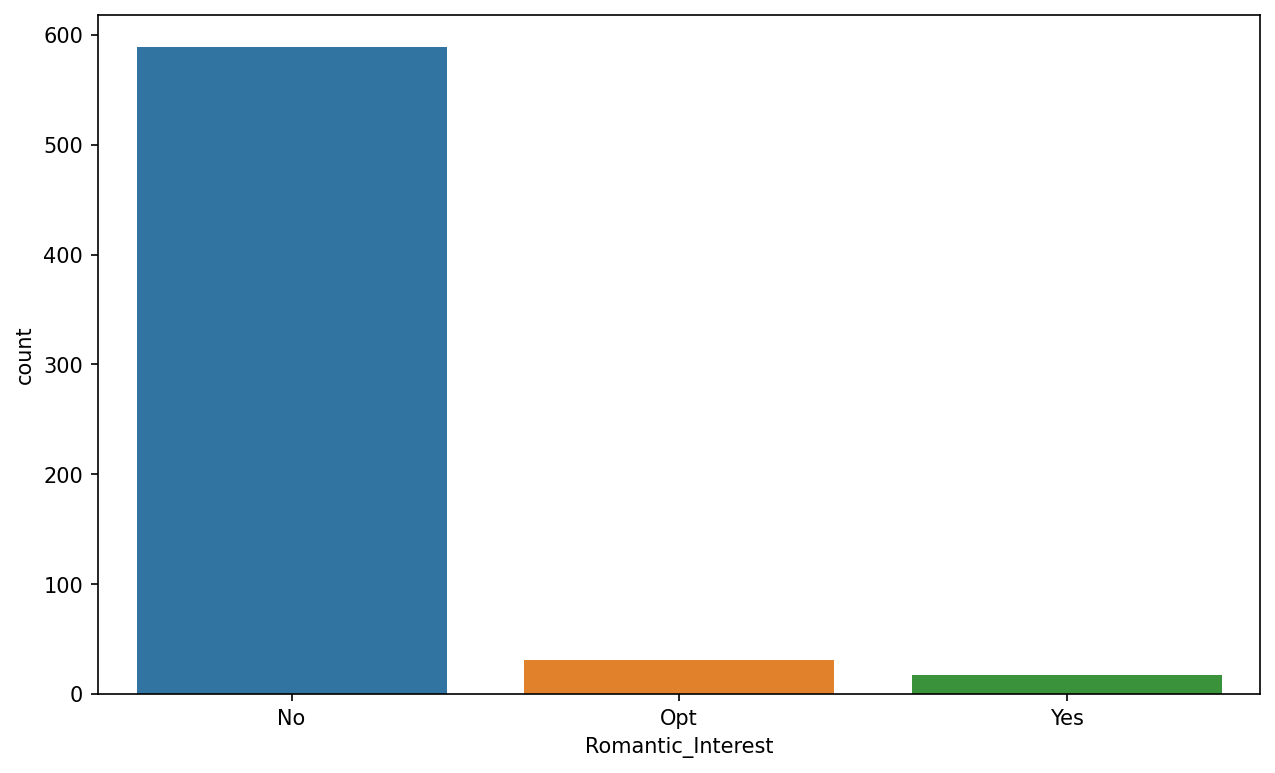

In [58]:
plt.figure(figsize=(10,6),dpi=150)
chart = sn.barplot(x=romain['Romantic_Interest'],y=romain['count'])
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

## ***ABOUT GAMES AND CHARACTERS***

Just analyze on Protagonist.

In [59]:
res = pd.merge(left=games, right=characters, left_on='Game_Id', right_on='Game', how='left')
res = res[res['Relevance']=='PA']
res.head()

,Game_Id,Title,Release,Series,Genre,Sub-genre,Developer,Publisher,Country,Platform,...,Gender,Game,Age_range,Playable,Sexualization,Id,Species,Side,Relevance,Romantic_Interest
2,GTAV,Grand Theft Auto V,2022-11-13,GTA,Action-adventure,Action-adventure,Rockstar North,Rockstar Games,GBR,Multi,...,Male,GTAV,Middle-aged,1,0,GTAV_Michael,Human,P,PA,No
3,GTAV,Grand Theft Auto V,2022-11-13,GTA,Action-adventure,Action-adventure,Rockstar North,Rockstar Games,GBR,Multi,...,Male,GTAV,Middle-aged,1,0,GTAV_Trevor,Human,P,PA,No
4,GTAV,Grand Theft Auto V,2022-11-13,GTA,Action-adventure,Action-adventure,Rockstar North,Rockstar Games,GBR,Multi,...,Male,GTAV,Adult,1,0,GTAV_Franklin,Human,P,PA,No
11,PSS,Pokémon Sword/Shield,2022-11-19,Pokémon,RPG,RPG,Game Freak,Nintendo,JPN,Nintendo Switch,...,Custom,PSS,Teenager,1,0,PSS_Protagonist,Human,P,PA,No
20,CODMW,Call of Duty: Modern Warfare,2022-10-19,Call of Duty,Action,FPS,Infinity Ward,Activision,USA,Multi,...,Female,CODMW,Adult,1,0,CODMW_Farah,Human,P,PA,No


### **Score by species**

In [60]:
spe_score = res.groupby('Species').agg(metacritic=('Metacritic','mean')
                                            , destructoid=('Destructoid','mean')
                                            , ign=('IGN','mean')
                                            , gamespot=('GameSpot','mean')
                                            , avg=('Avg_Reviews','mean')).transpose()
spe_score

Species,Android-Robot,Animated Object,Creature,Human,Humanoid,Humanoid-Animal,Unknown
metacritic,8.9,8.7,8.900000,8.863077,8.700,8.600000,8.8
destructoid,9.0,9.5,9.333333,9.032308,9.375,9.333333,9.0
ign,8.9,8.8,9.000000,9.296923,9.175,8.900000,8.0
gamespot,9.0,8.5,8.833333,8.709231,9.000,9.000000,8.0
avg,9.0,8.9,9.033333,8.976923,9.075,8.966667,8.5


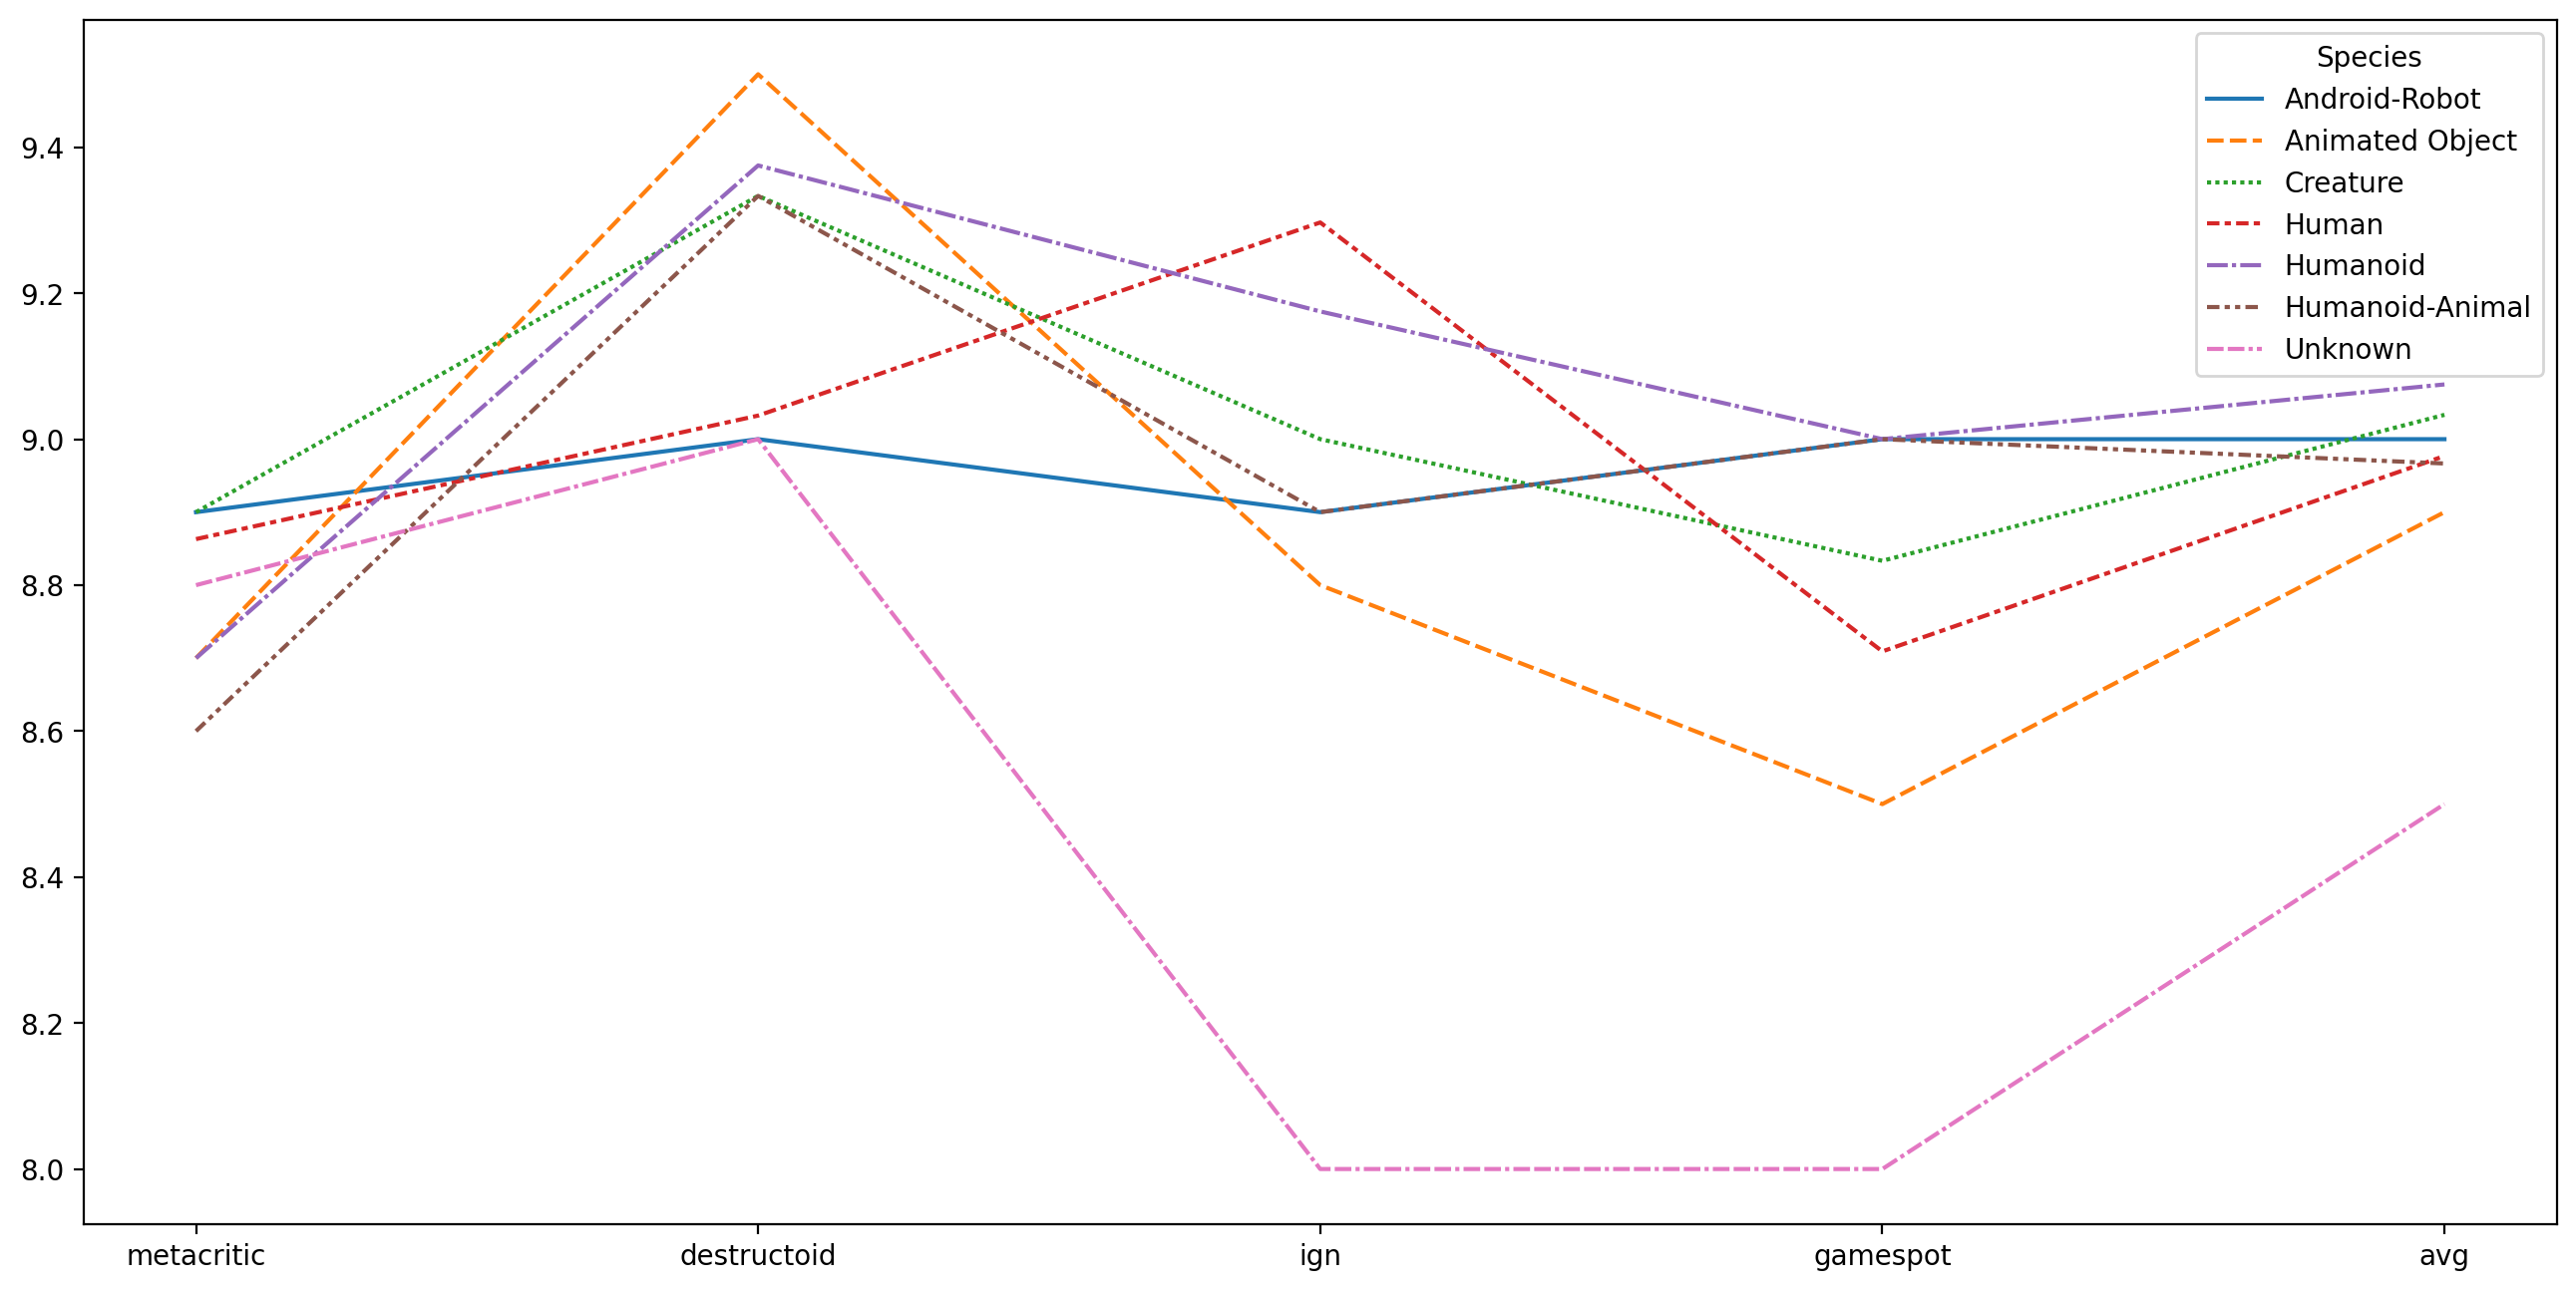

In [61]:
plt.figure(figsize=(16,8),dpi=200)
sn.lineplot(data=spe_score)
plt.show()

### **Score by Gender**

In [62]:
gen_score = res.groupby('Gender').agg(metacritic=('Metacritic','mean')
                                            , destructoid=('Destructoid','mean')
                                            , ign=('IGN','mean')
                                            , gamespot=('GameSpot','mean')
                                            , avg=('Avg_Reviews','mean')).transpose()
gen_score

Gender,Custom,Female,Male,Non-binary
metacritic,8.9625,8.68750,8.864444,8.881818
destructoid,8.9375,8.93750,9.102222,9.318182
ign,9.3500,9.22500,9.246667,8.972727
gamespot,9.1250,8.53125,8.677778,8.872727
avg,9.0750,8.85625,8.975556,9.036364


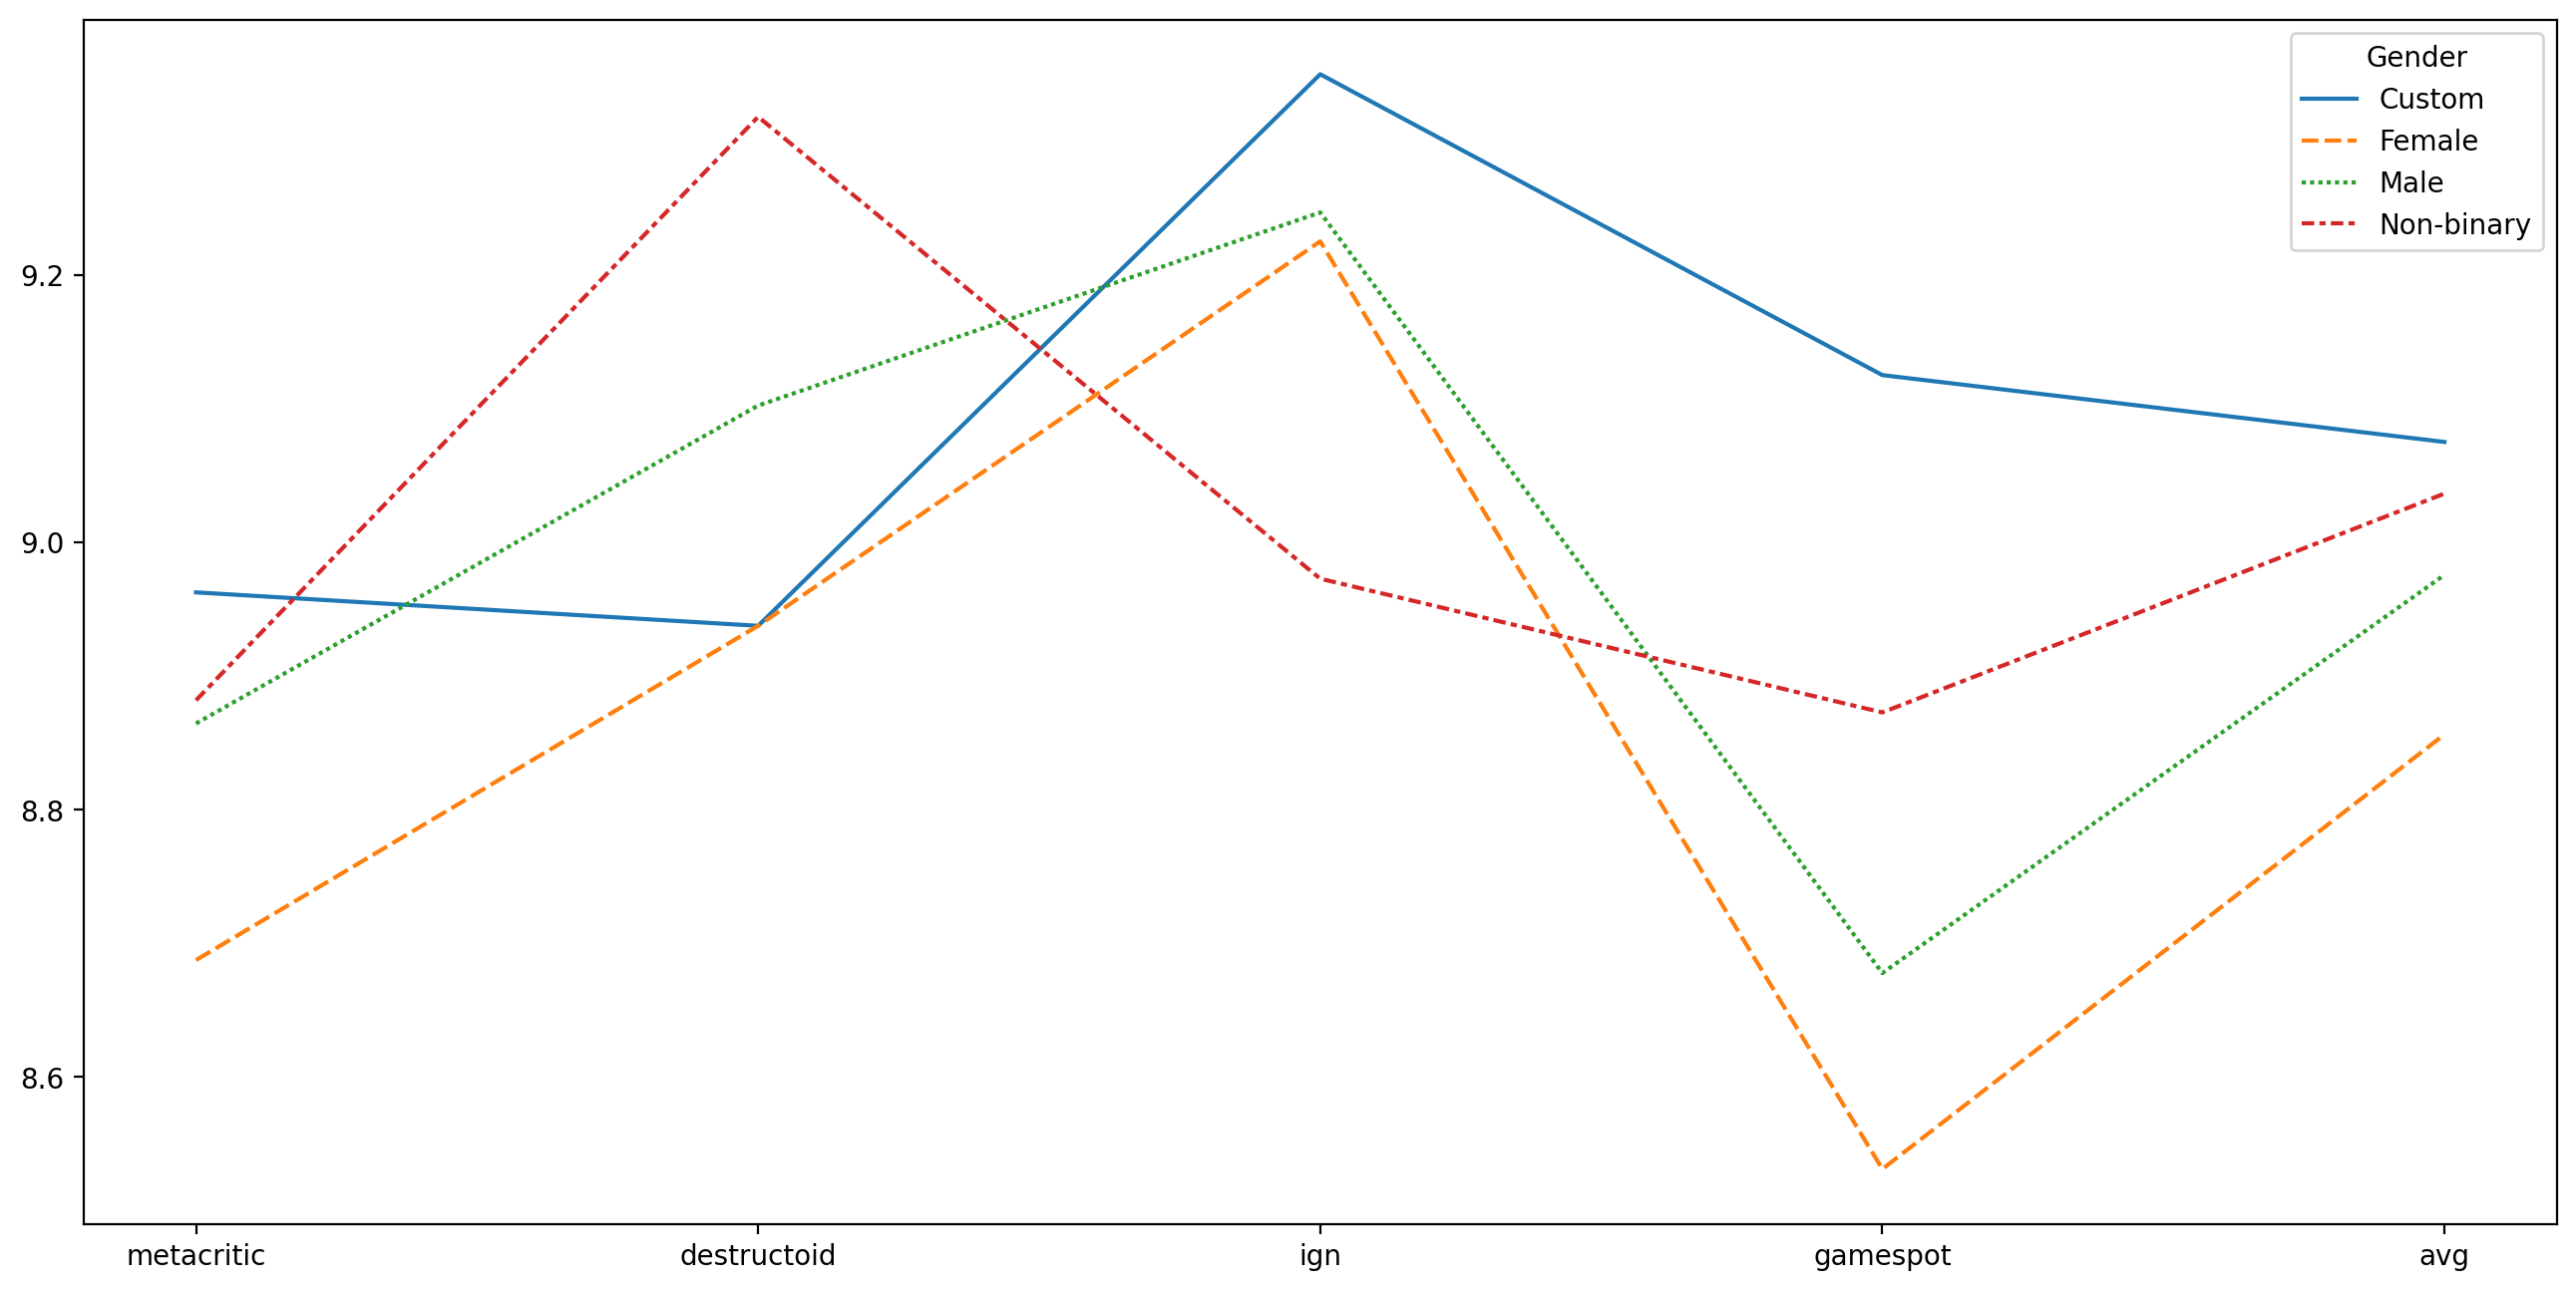

In [63]:
plt.figure(figsize=(16,8),dpi=200)
sn.lineplot(data=gen_score)
plt.show()

### **Score by Romantic Interest**

In [64]:
rom_score = res.groupby('Romantic_Interest').agg(metacritic=('Metacritic','mean')
                                            , destructoid=('Destructoid','mean')
                                            , ign=('IGN','mean')
                                            , gamespot=('GameSpot','mean')
                                            , avg=('Avg_Reviews','mean')).transpose()
rom_score

Romantic_Interest,No,Yes
metacritic,8.839744,8.9
destructoid,9.084615,9.0
ign,9.220513,9.0
gamespot,8.712821,9.0
avg,8.969231,9.0


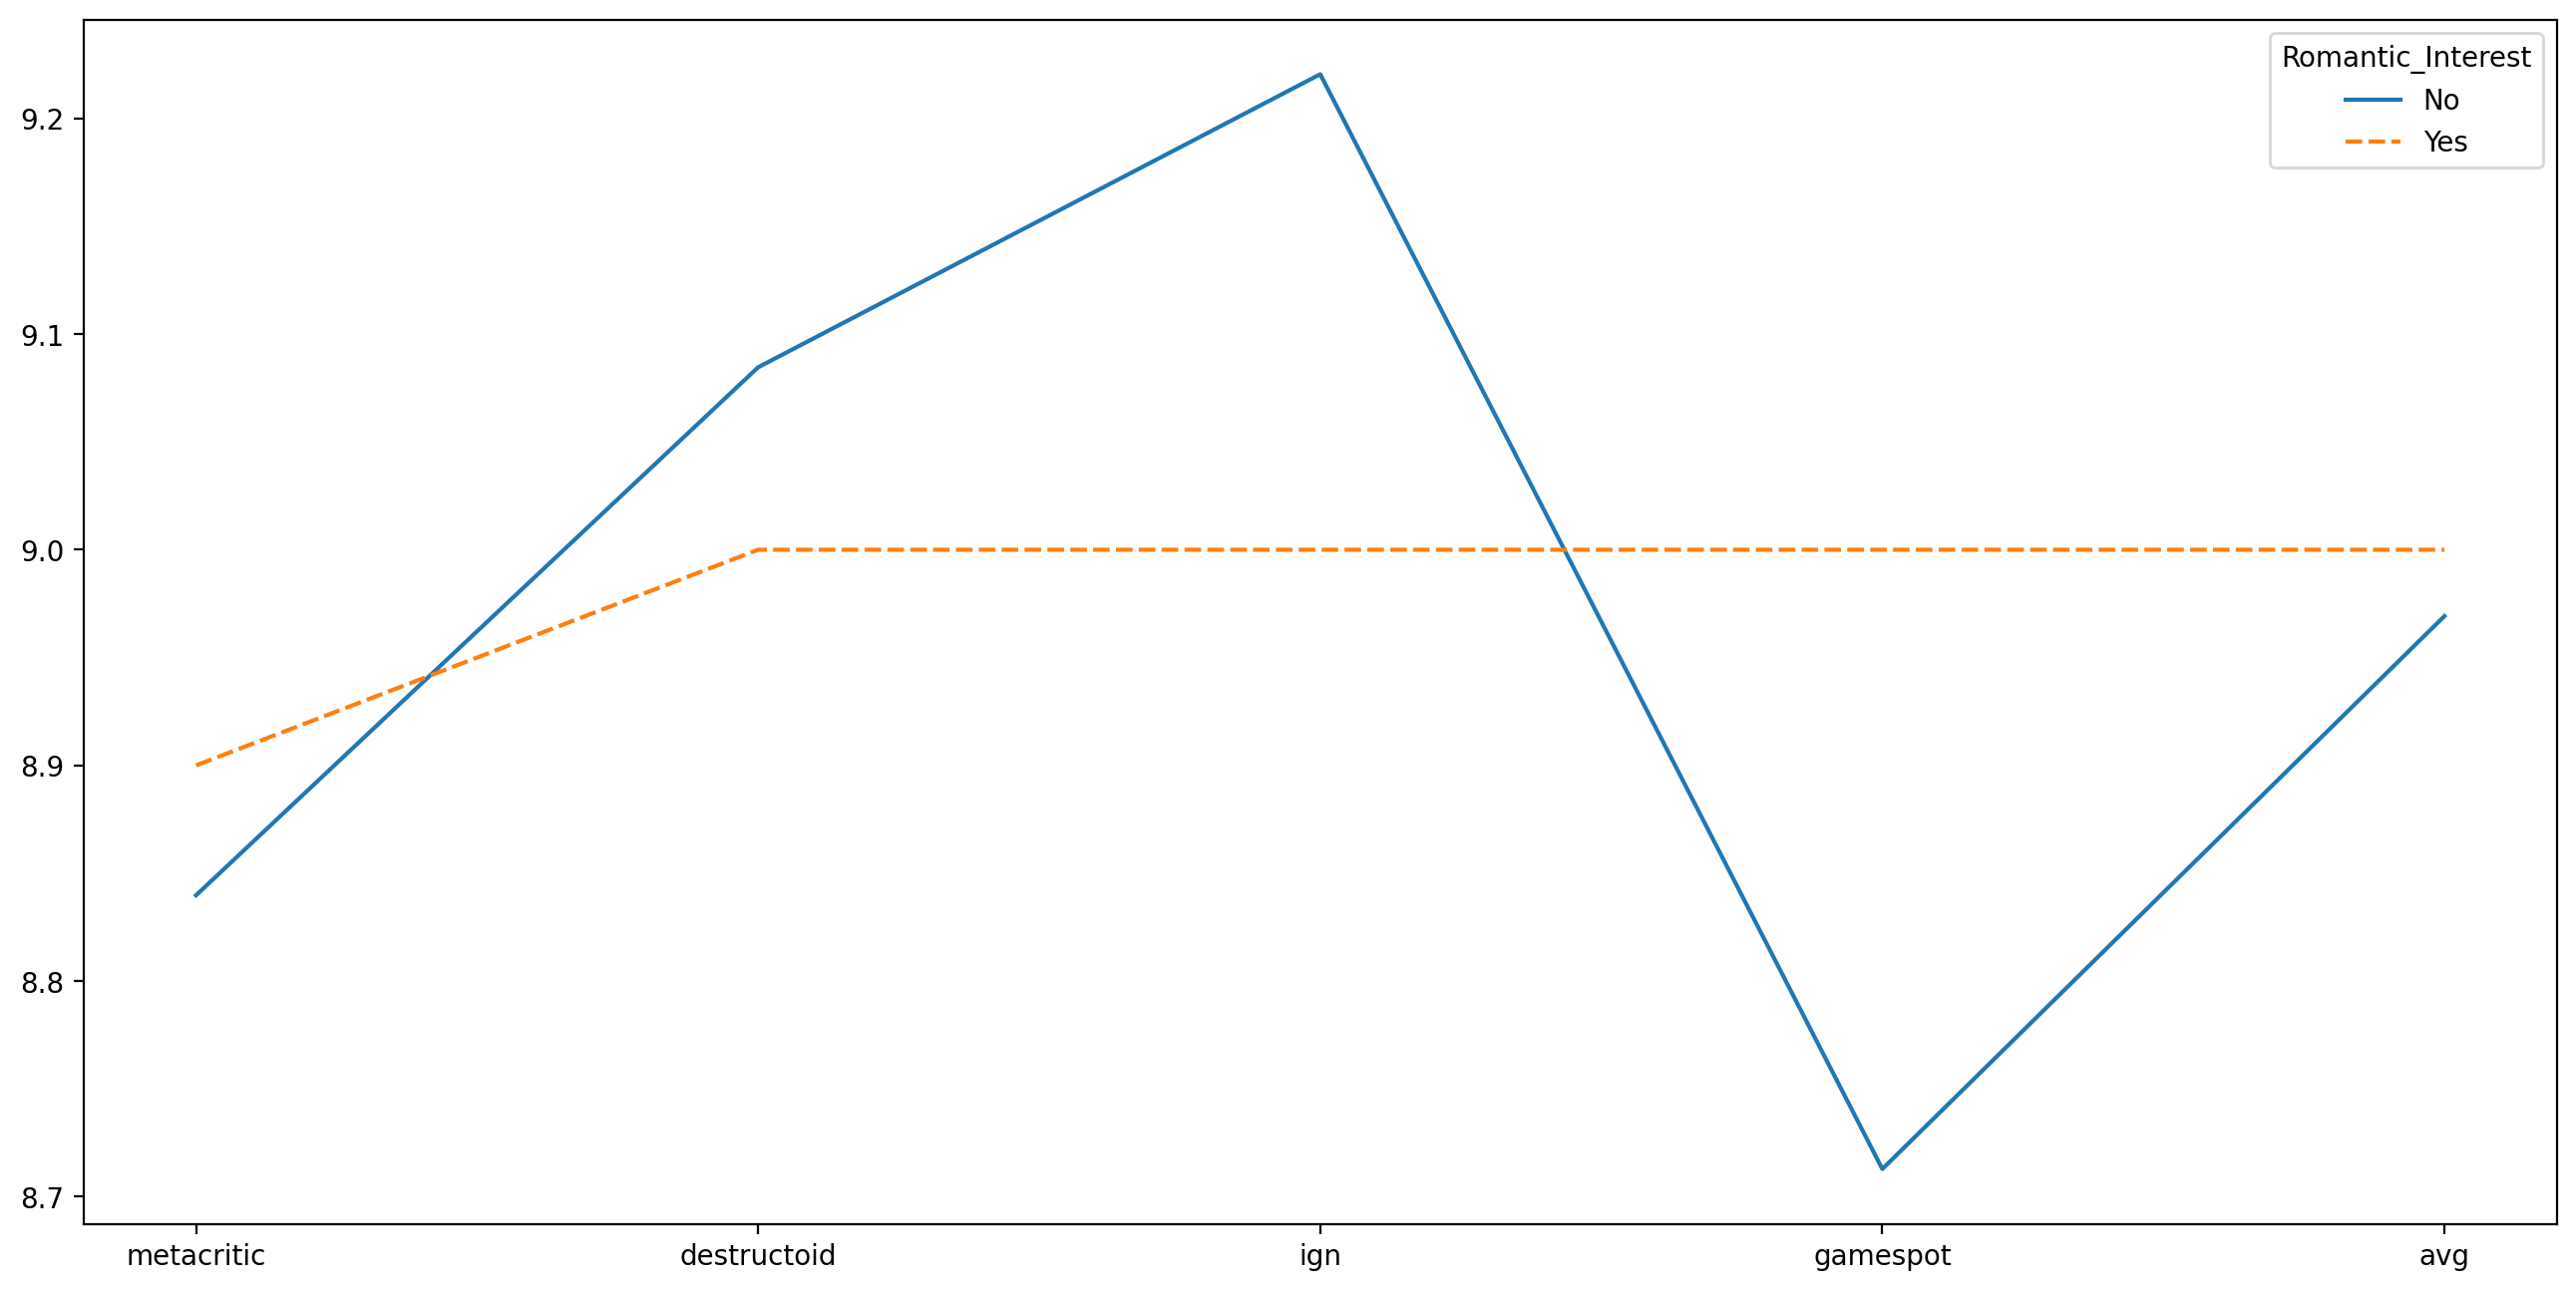

In [65]:
plt.figure(figsize=(16,8),dpi=200)
sn.lineplot(data=rom_score)
plt.show()